<div id="toc"><h1>Table of Contents</h1></div>

<div id="backTotop" class="alert alert-block alert-info">
    <ol>
        <li><a href="#bsnobjcts">Business Objectives</a>
        </li>
        <li value="2"><a href="#dtprocess">Data preprocessing</a>
            <ol style="list-style-type:none;padding-left:0">
                <li>2.1 <a href="#remdplctval">Removing Duplicated Values</a></li>
                <li>2.2 <a href="#checkdatatypes">Checking and Converting Datatypes</a></li>
                <li>2.3 <a href="#splittrandevsets">Splitting the Dataset into Training, Test, Dev Sets</a></li>
                <li>2.4 <a href="#outliershandling">Detecting and Handling Outliers</a></li>
                <li>2.5 <a href="#detecmisval">Detecting and Imputing Missing Values</a></li>
            </ol>
        </li>
        <li><a href="#edavis">Exploratory Data Analysis (EDA) and Data Visualization</a>
            <ol style="list-style-type:none;padding-left:0">
                <li>3.1 <a href="#addbusobj">Addressing Business Objectives</a></li>
                <li>3.2 <a href="#unncols">Drop Unnecessary Columns</a></li>
                <li>3.3 <a href="#kmeansclus">K-means Clustering</a></li>
            </ol>
        </li>
        <li><a href="#feslecenginering">Feature Selection and Engineering</a>
            <ol style="list-style-type:none;padding-left:0">
                <li>4.1 <a href="#corrmatrix">Correlation Matrix</a></li>
            </ol>
        </li>
        <li><a href="#modselbuild">Model Selection and Building</a>
            <ol style="list-style-type:none;padding-left:0">
                <li>5.1 <a href="#mcagstegs">Model Comparison Across Stages</a></li>
                <li>5.2 <a href="#pipline">Pipeline</a></li>
            </ol>
        </li>
    </ol>
</div>

Kaggle is challenging you to build a model that predicts the total ride duration of taxi trips in **New York City**. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.
- https://www.kaggle.com/c/nyc-taxi-trip-duration

<div id="bsnobjcts">
    <div style="font-size:25pt;font-weight:700;padding:20px 0;line-height:1.2">1. Business Objectives</div>
</div>

1. What are the maximum, minimum, mean, count, and sum of trip durations from 2016?
2. What are the maximum, minimum, mean, and sum of distances from 2016?
3. What are the maximum, minimum, and mean of taxi speeds from 2016?
4. Do trip duration and distance have a linear relationship, such as v = s/t (where t is proportional to s)?
5. Which vendor had the largest number of trip duration in 2016?
6. Which vendor had the larger total distance in 2016?
7. What are the average taxi speeds for each vendor in 2016?
8. How many taxi trips were made by each vendor in 2016?
9. How many taxi trips were there for any trip that was either ordered (pickup) or completed (drop-off) within a 24-hour period in 2016?
10. How many taxi trips were there for any trip that was either ordered (pickup) or completed (drop-off) during different parts of the day in 2016?
11. How many taxi trips were there on weekdays in 2016?
12. How many taxi trips were there each month in 2016?
13. What was the average distance covered by taxis for trips that were either ordered (pickup) or completed (drop-off) within a 24-hour period in 2016?
14. What was the average speed of taxis within a 24-hour period in 2016?
15. Was the number of passengers related to trip duration?
16. Did the number of passengers relate to the available vendors?
17. What was the operational area for taxi trips in 2016?
18. Which areas allowed taxis to send data in real-time?
19. Did the ability to send data in real-time affect taxi trip duration?
20. Did the ability to send data in real-time depend on how far or close the distance was?

<div id="dtprocess">
    <div style="font-size:25pt;font-weight:700;padding:20px 0;line-height:1.2">2. Data preprocessing</div>
</div>

In [1]:
from utils import *

In [2]:
df = pd.read_csv("train.csv")

<div id="remdplctval">
    <div style="font-size:20pt;font-weight:700;padding:20px 0;line-height:1.2">2.1 Removing Duplicated Values</div>
</div>

In [3]:
df.duplicated().sum().sum()

0

<div id="checkdatatypes">
    <div style="font-size:20pt;font-weight:700;padding:20px 0;line-height:1.2">2.2 Checking and Converting Datatypes</div>
</div>

In [4]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [6]:
df.shape

(1458644, 11)

In [7]:
df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

**distance, great_circle**

Let's calculate distance using the great circle method. A great circle is the shortest path between two points on the surface of a sphere. On Earth, this is often used for measuring distances between two locations based on their latitude and longitude. The method accounts for the curvature of the Earth and provides a more accurate distance than a straight line on a flat map (which would give the "as-the-crow-flies" distance).

In [8]:
df_subset = df.copy()

In [9]:
df_subset['distance_gc'] = df_subset.apply(calculate_distance_gc, axis=1)

In [10]:
df_subset.head()['distance_gc']

0    1.498523
1    1.805510
2    6.385108
3    1.485501
4    1.188590
Name: distance_gc, dtype: float64

In [11]:
df_subset['speed_gc'] = df_subset.apply(lambda row: calculate_speed(row['trip_duration'], row['distance_gc']), axis=1)

From the data, we observe that the average speed is approximately 14.4 km/h. However, this calculation uses the `great_circle` function, which estimates the shortest distance between two points on a spherical surface, assuming the Earth is a perfect sphere. While this method provides a reasonable approximation for long distances, such as intercity or international travel, it can lead to inaccuracies over short distances, especially in urban environments. The `great_circle` method measures the straight-line distance, or "as the crow flies," which doesn't account for actual road networks, detours, obstacles, or geographic features.

To improve accuracy, it's necessary to calculate the actual road distance instead of relying on straight-line distance. Tools like OpenStreetMap (OSM) provide detailed road network data, enabling us to compute distances that reflect real-world driving paths. By integrating these road distances, we can recalculate the average speed to represent realistic travel routes and times, offering a more accurate depiction of vehicle movement.

In [12]:
df_subset.head()[['trip_duration', 'distance_gc', 'speed_gc']]

,trip_duration,distance_gc,speed_gc
0,455,1.498523,11.856445
1,663,1.805510,9.803673
2,2124,6.385108,10.822216
3,429,1.485501,12.465739
4,435,1.188590,9.836608


In [13]:
with pd.option_context('display.float_format', '{:.3f}'.format):
    print(df_subset.describe()['speed_gc'])

count   1458644.000
mean         14.423
std          14.978
min           0.000
25%           9.121
50%          12.792
75%          17.845
max        9274.850
Name: speed_gc, dtype: float64


**distance, osmnx**

Calculating actual road distances using OpenStreetMap (OSM) data with OSMNX library, which interfaces with OSM to get the network and calculate road distances.

In [14]:
df_subset = df_subset.copy().head(5)  # Take only the first 5 rows

In [15]:
df_subset

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance_gc,speed_gc
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523,11.856445
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510,9.803673
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385108,10.822216
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485501,12.465739
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590,9.836608


In [16]:
df_subset = cal_road_distance_osmnx(df_subset)

In [17]:
df_subset['speed_osmnx'] = df_subset.apply(lambda row: calculate_speed(row['trip_duration'], row['distance_osmnx']), axis=1)

In [18]:
df_subset.iloc[:, -4:].head()

,distance_gc,speed_gc,distance_osmnx,speed_osmnx
0,1.498523,11.856445,1.967594,15.567777
1,1.805510,9.803673,2.500146,13.575453
2,6.385108,10.822216,7.239872,12.270969
3,1.485501,12.465739,1.708266,14.335099
4,1.188590,9.836608,1.747517,14.462210


The analysis using OpenStreetMap (OSM) data with the OSMnx library shows that the calculated average speed was only 14 km/hour. This result reflects the data from OSMnx, which is more focused on network structure and may not accurately represent real-world travel speeds, as it doesn't account for specific driving conditions such as traffic, road type, or speed limits.

To enhance the accuracy of our speed calculation, we will now compare this result with OSRM (Open Source Routing Machine). OSRM is a routing engine that uses OSM data but includes factors like actual road speeds, traffic rules, and driving conditions, providing a more realistic estimate of travel time and average speed. By comparing the results from both OSMnx and OSRM, we can determine the discrepancies and assess the impact of real-world conditions on travel speeds.

In [19]:
df_subset.describe()['speed_osmnx']

count     5.000000
mean     14.042302
std       1.219087
min      12.270969
25%      13.575453
50%      14.335099
75%      14.462210
max      15.567777
Name: speed_osmnx, dtype: float64

**distance, osrm**

In [20]:
df_subset = cal_road_distance_osrm(df_subset)

Processing row 0 of 5...


In [21]:
df_subset['speed_osrm'] = df_subset.apply(lambda row: calculate_speed(row['trip_duration'], row['distance_osrm']), axis=1)

In [22]:
df_subset.iloc[:, -6:].head()

,distance_gc,speed_gc,distance_osmnx,speed_osmnx,distance_osrm,speed_osrm
0,1.498523,11.856445,1.967594,15.567777,2.1597,17.087736
1,1.805510,9.803673,2.500146,13.575453,2.5118,13.638733
2,6.385108,10.822216,7.239872,12.270969,9.9350,16.838983
3,1.485501,12.465739,1.708266,14.335099,1.7766,14.908531
4,1.188590,9.836608,1.747517,14.462210,1.6066,13.296000


In [23]:
df_subset.describe()['speed_osrm']

count     5.000000
mean     15.153997
std       1.759755
min      13.296000
25%      13.638733
50%      14.908531
75%      16.838983
max      17.087736
Name: speed_osrm, dtype: float64

**distance, google maps (manual)**

In [24]:
print(df_subset[["pickup_longitude","pickup_latitude", "dropoff_longitude", "dropoff_latitude"]])

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude
0        -73.982155        40.767937         -73.964630         40.765602
1        -73.980415        40.738564         -73.999481         40.731152
2        -73.979027        40.763939         -74.005333         40.710087
3        -74.010040        40.719971         -74.012268         40.706718
4        -73.973053        40.793209         -73.972923         40.782520


speed = distance/time

- https://www.google.com/maps/dir/40.767937,-73.982155/40.765602,-73.964630
- distance1 = 2 km
- time1 = 5 mins

* https://www.google.com/maps/dir/40.738564,-73.980415/40.731152,-73.999481
* distance2 = 2.5 km
* time2 = 6 mins

- https://www.google.com/maps/dir/40.763939,-73.979027/40.710087,-74.005333
- distance3 = 11.1 km
- time3 = 16 mins

* https://www.google.com/maps/dir/40.719971,-74.010040/40.706718,-74.012268
* distance4 = 1.8 km
* time4 = 6 mins

- https://www.google.com/maps/dir/40.793209,-73.973053/40.782520,-73.972923
- distance5 = 1.6 km
- time5 = 4 mins

![gmaps](img/gmaps.png)

In [25]:
df_gmaps = {
    'time_gmaps': [5*60, 6*60, 16*60, 6*60, 4*60],
    'distance_gmaps': [2.0, 2.5, 11.1, 1.8, 1.6]
}

df_gmaps_df = pd.DataFrame(df_gmaps)

In [26]:
df_subset[['time_gmaps', 'distance_gmaps']] = df_gmaps_df[['time_gmaps', 'distance_gmaps']]

In [27]:
df_subset['speed_gmaps'] = df_subset.apply(lambda row: calculate_speed(row['time_gmaps'], row['distance_gmaps']), axis=1)

**Comparative Analysis**
- The distances calculated using the great-circle method (`distance_gc`) do not closely match the distances obtained from the OpenStreetMap network (`distance_osmnx`), OSRM (`distance_osrm`), and Google Maps (`distance_gmaps`).
- A significant issue arises when comparing `trip_duration` from our dataset with `time_gmaps` (estimated time from Google Maps), as discrepancies in these time measurements lead to substantial differences in calculated speeds.
- Specifically, the differences in trip durations affect the computed speeds, resulting in considerable variations. For instance, the speeds calculated from the great-circle method (`speed_gc`) show lower values compared to those from OpenStreetMap distances (`speed_osmnx`), OSRM (`speed_osrm`), and Google Maps (`speed_gmaps`).
- Notably, the speeds derived from OSMNX (`speed_osmnx`) and OSRM (`speed_osrm`) are generally more consistent and closely aligned with those from Google Maps (`speed_gmaps`). This alignment suggests that OSMNX and OSRM provide reliable estimates, making them preferable choices for further analysis. Their integration of real-world factors such as actual road conditions, traffic rules, and driving conditions enhances the accuracy of distances, setting them apart from the other methods.
- Additionally, it is important to note that we cannot use the Google Maps API due to its high cost. As we have identified that the primary issue lies in the **time discrepancies** rather than the distance measurements, it is prudent to utilize free open-source alternatives like OSRM. This approach not only mitigates costs but also maintains accuracy in our analysis.

In [28]:
df_subset[["trip_duration", "time_gmaps", "distance_gc", "distance_osmnx", "distance_osrm", "distance_gmaps", 
           "speed_gc", "speed_osmnx", "speed_osrm", "speed_gmaps"]]

,trip_duration,time_gmaps,distance_gc,distance_osmnx,distance_osrm,distance_gmaps,speed_gc,speed_osmnx,speed_osrm,speed_gmaps
0,455,300,1.498523,1.967594,2.1597,2.0,11.856445,15.567777,17.087736,24.000
1,663,360,1.805510,2.500146,2.5118,2.5,9.803673,13.575453,13.638733,25.000
2,2124,960,6.385108,7.239872,9.9350,11.1,10.822216,12.270969,16.838983,41.625
3,429,360,1.485501,1.708266,1.7766,1.8,12.465739,14.335099,14.908531,18.000
4,435,240,1.188590,1.747517,1.6066,1.6,9.836608,14.462210,13.296000,24.000


**recalculating distance using osmnx method**

In [29]:
# 50 sample
df_50 = df.copy()

In [30]:
df_50 = df_50.head(50)

In [31]:
%%time
df_50 = cal_road_distance_osmnx(df_50)

CPU times: total: 2min 38s
Wall time: 2min 39s


50 samples = 150 seconds

In [32]:
# the result is in second
(150/50)*1458644

4375932.0

In [33]:
(4375932/3600)/24

50.64736111111111

The estimated processing time for calculating distances is approximately **50 days**, which is not feasible. We can revisit this task later if we gain access to more efficient computational resources.

**recalculating distance using osrm method**

In [34]:
# 200 sample
df_200 = df.copy()

In [35]:
df_200 = df_200.head(200)

In [36]:
%%time
df_200 = cal_road_distance_osrm(df_200)

Processing row 0 of 200...
Processing row 100 of 200...
CPU times: total: 641 ms
Wall time: 1min 42s


200 samples = 100 seconds

In [37]:
df.shape

(1458644, 11)

x / 1458644 = 100 seconds / 200 samples

In [38]:
# the result is in second
(100/200)*1458644

729322.0

In [39]:
(729322/3600)/24

8.441226851851852

The estimated processing time for the distance calculation is approximately **8 days**, which is impractical. 

It seems worthwhile to recalculate the distance using the OSRM method, which is more advanced and efficient compared to the OSMnx method. OSRM (Open Source Routing Machine) is specifically optimized for fast routing calculations on road networks, while OSMnx, although powerful for graph analysis and network extraction, can be slower for large-scale routing computations.

Given this, I decided to **install OSRM locally** and recalculate the distances using its more optimized algorithms for better performance.

**recalculating the distance using the OSRM method locally**

In [40]:
# %%time
# # running time = 4-5 hours
# df = cal_road_distance_osrm_local(df)

In [41]:
# df.to_csv('distance_osrm.csv', index=False)

In [42]:
df = pd.read_csv("distance_osrm.csv")

In [43]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance_osrm
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2.1587
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2.5113
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,9.9354
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.7776
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.6064


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
 11  distance_osrm       1458627 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 133.5+ MB


In [45]:
df.shape

(1458644, 12)

**speed, osrm**

In [46]:
df['speed_osrm'] = df.apply(lambda row: calculate_speed(row['trip_duration'], row['distance_osrm']), axis=1)

In [47]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance_osrm,speed_osrm
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2.1587,17.079824
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2.5113,13.636018
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,9.9354,16.839661
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.7776,14.916923
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.6064,13.294345


In [48]:
with pd.option_context('display.float_format', '{:.3f}'.format):
    print(df.describe()["speed_osrm"])

count   1458627.000
mean         19.477
std          31.748
min           0.000
25%          12.361
50%          16.986
75%          23.253
max       12246.891
Name: speed_osrm, dtype: float64


Let's revisit our `df_subset` dataframe. As previously mentioned, a critical challenge emerges when we compare `trip_duration` from the dataset with `time_gmaps`, which represents the estimated duration from Google Maps. These discrepancies result in significant variations in the calculated speeds. Such variations may arise due to different factors: traffic conditions, taxi behavior (e.g., stopping for passengers), or road closures and detours not accounted for during the trip. These factors should be accounted for when interpreting results.

Furthermore, the average speed derived from `speed_osrm` is **19.47 km/h**. While this provides a baseline, it's important to contextualize this value against New York City's typical traffic patterns and speed limits. The city's congestion, frequent stops, and potential inefficiencies in routes mean that deviations from this average are expected. Therefore, it is crucial to assess whether this average aligns with realistic expectations for taxi travel in NYC.

**By further exploring** outliers or extreme deviations, we could uncover patterns or systemic issues in specific routes, times of day, or regions, enhancing the predictive power of our machine learning model.

In [49]:
df_subset[["trip_duration", "time_gmaps", "distance_osrm", "distance_gmaps", "speed_osrm", "speed_gmaps"]]

,trip_duration,time_gmaps,distance_osrm,distance_gmaps,speed_osrm,speed_gmaps
0,455,300,2.1597,2.0,17.087736,24.000
1,663,360,2.5118,2.5,13.638733,25.000
2,2124,960,9.9350,11.1,16.838983,41.625
3,429,360,1.7766,1.8,14.908531,18.000
4,435,240,1.6066,1.6,13.296000,24.000


**datetime**

In [50]:
df["pickup_datetime"].head()

0    2016-03-14 17:24:55
1    2016-06-12 00:43:35
2    2016-01-19 11:35:24
3    2016-04-06 19:32:31
4    2016-03-26 13:30:55
Name: pickup_datetime, dtype: object

In [51]:
df = datetime_transform(df)

In [52]:
df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance_osrm,...,pickup_datetime_year,pickup_datetime_month,pickup_datetime_hour,pickup_datetime_weekday,pickup_datetime_period,dropoff_datetime_year,dropoff_datetime_month,dropoff_datetime_hour,dropoff_datetime_weekday,dropoff_datetime_period
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2.1587,...,2016,3,17,Monday,Evening,2016,3,17,Monday,Evening
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2.5113,...,2016,6,0,Sunday,Early Morning,2016,6,0,Sunday,Early Morning
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,9.9354,...,2016,1,11,Tuesday,Morning,2016,1,12,Tuesday,Afternoon
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.7776,...,2016,4,19,Wednesday,Evening,2016,4,19,Wednesday,Evening
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.6064,...,2016,3,13,Saturday,Afternoon,2016,3,13,Saturday,Afternoon


**pickup_datetime_year, dropoff_datetime_year**

Since the data only contains trips from a single year (2016), these features do not provide any variability or additional value for the machine learning model and should be dropped.

In [53]:
df["pickup_datetime_year"].unique()

array([2016], dtype=int64)

In [54]:
df["dropoff_datetime_year"].unique()

array([2016], dtype=int64)

In [55]:
df.drop(["pickup_datetime_year", "dropoff_datetime_year"], axis=1, inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype   
---  ------                    --------------    -----   
 0   id                        1458644 non-null  object  
 1   vendor_id                 1458644 non-null  int64   
 2   passenger_count           1458644 non-null  int64   
 3   pickup_longitude          1458644 non-null  float64 
 4   pickup_latitude           1458644 non-null  float64 
 5   dropoff_longitude         1458644 non-null  float64 
 6   dropoff_latitude          1458644 non-null  float64 
 7   store_and_fwd_flag        1458644 non-null  object  
 8   trip_duration             1458644 non-null  int64   
 9   distance_osrm             1458627 non-null  float64 
 10  speed_osrm                1458627 non-null  float64 
 11  pickup_datetime_month     1458644 non-null  int64   
 12  pickup_datetime_hour      1458644 non-null  int64   
 13  pickup_datet

**vendor_id, datetime_month, datetime_hour**

In [57]:
cols_to_convert = ['vendor_id', 'pickup_datetime_month', 'pickup_datetime_hour', 
                      'dropoff_datetime_month', 'dropoff_datetime_hour']

In [58]:
df[cols_to_convert] = df[cols_to_convert].astype('object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype   
---  ------                    --------------    -----   
 0   id                        1458644 non-null  object  
 1   vendor_id                 1458644 non-null  object  
 2   passenger_count           1458644 non-null  int64   
 3   pickup_longitude          1458644 non-null  float64 
 4   pickup_latitude           1458644 non-null  float64 
 5   dropoff_longitude         1458644 non-null  float64 
 6   dropoff_latitude          1458644 non-null  float64 
 7   store_and_fwd_flag        1458644 non-null  object  
 8   trip_duration             1458644 non-null  int64   
 9   distance_osrm             1458627 non-null  float64 
 10  speed_osrm                1458627 non-null  float64 
 11  pickup_datetime_month     1458644 non-null  object  
 12  pickup_datetime_hour      1458644 non-null  object  
 13  pickup_datet

<div id="splittrandevsets">
    <div style="font-size:20pt;font-weight:700;padding:20px 0;line-height:1.2">2.3 Splitting the Dataset into Training and Test Sets</div>
</div>

In [60]:
X = df.drop(columns="trip_duration", axis=1)
y = df["trip_duration"]

In [61]:
# train = 80%, test = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = rst)

In [62]:
print(f"training shapes: {X_train.shape}, {y_train.shape}")
print(f"testing shapes: {X_test.shape}, {y_test.shape}")

training shapes: (1166915, 18), (1166915,)
testing shapes: (291729, 18), (291729,)


In [63]:
df = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [64]:
print(f"train shape: {df.shape}")
print(f"test shape: {test.shape}")

train shape: (1166915, 19)
test shape: (291729, 19)


---

In [65]:
df.to_csv('train_temp.csv', index=False) # index=False to avoid saving the index as a column
test.to_csv('test_temp.csv', index=False)

In [66]:
stop_here = True

if stop_here:
    raise RuntimeError("Execution stopped manually.")

RuntimeError: Execution stopped manually.

In [2]:
dtype_columns = {
    'vendor_id': 'object',
    'pickup_datetime_month': 'object',
    'pickup_datetime_hour': 'object',
    'dropoff_datetime_month': 'object',
    'dropoff_datetime_hour': 'object'
}

In [3]:
df = pd.read_csv('train_temp.csv', dtype=dtype_columns)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166915 entries, 0 to 1166914
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   id                        1166915 non-null  object 
 1   vendor_id                 1166915 non-null  object 
 2   passenger_count           1166915 non-null  int64  
 3   pickup_longitude          1166915 non-null  float64
 4   pickup_latitude           1166915 non-null  float64
 5   dropoff_longitude         1166915 non-null  float64
 6   dropoff_latitude          1166915 non-null  float64
 7   store_and_fwd_flag        1166915 non-null  object 
 8   distance_osrm             1166899 non-null  float64
 9   speed_osrm                1166899 non-null  float64
 10  pickup_datetime_month     1166915 non-null  object 
 11  pickup_datetime_hour      1166915 non-null  object 
 12  pickup_datetime_weekday   1166915 non-null  object 
 13  pickup_datetime_period    1

<div id="outliershandling">
    <div style="font-size:20pt;font-weight:700;padding:20px 0;line-height:1.2">2.4 Detecting and Handling Outliers</div>
</div>

In the trip_duration column, we observe some suspiciously large maximum values. For example, the maximum value recorded is **3,526,282 seconds**, which translates to nearly **40 days** of trip duration. This is highly unusual for a taxi trip and likely represents erroneous data or outliers.

To better understand this, we can visualize the distribution of trip durations to see how these extreme values compare to the typical trip durations.

In [5]:
with pd.option_context('display.float_format', '{:.3f}'.format):
    print(df.describe())

       passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
count      1166915.000       1166915.000      1166915.000        1166915.000   
mean             1.664           -73.974           40.751            -73.973   
std              1.314             0.076            0.033              0.076   
min              0.000          -121.933           34.360           -121.933   
25%              1.000           -73.992           40.737            -73.991   
50%              1.000           -73.982           40.754            -73.980   
75%              2.000           -73.967           40.768            -73.963   
max              9.000           -61.336           51.881            -61.336   

       dropoff_latitude  distance_osrm  speed_osrm  trip_duration  
count       1166915.000    1166899.000 1166899.000    1166915.000  
mean             40.752          4.618      19.489        959.274  
std               0.036          5.623      32.721       5624.981  
min    

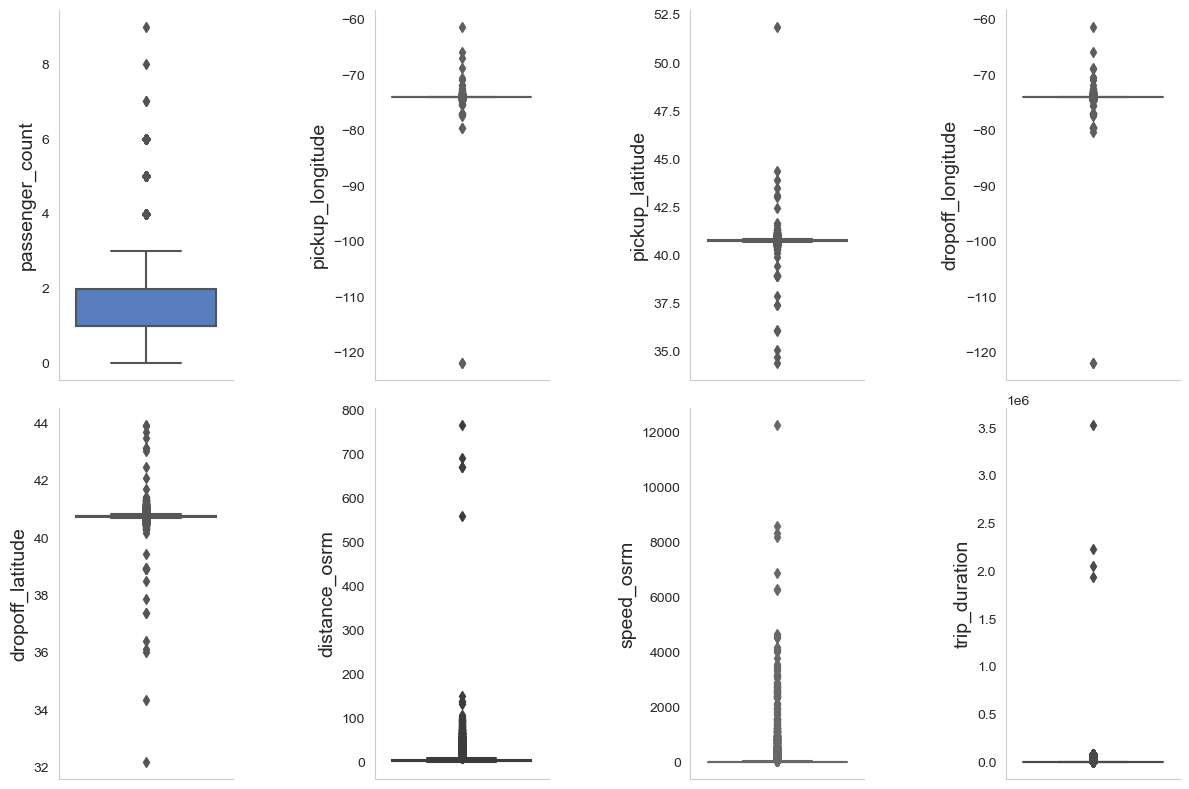

In [6]:
outliers_graph(df, df.columns.to_list())

**pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude**

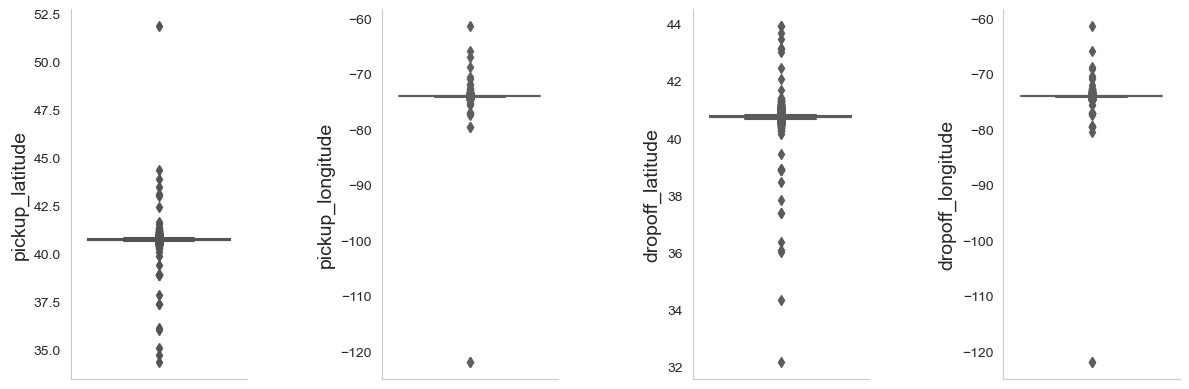

In [7]:
outliers_graph(df, ["pickup_latitude", "pickup_longitude", "dropoff_latitude", "dropoff_longitude"])

I will use the [NYC Taxi Zones dataset](https://data.cityofnewyork.us/Transportation/NYC-Taxi-Zones/d3c5-ddgc) as a reference to focus my analysis on pickup and dropoff points within the commonly used NYC Taxi Zones. This dataset will help narrow the scope to typical taxi routes in New York City, ensuring the study remains within relevant geographic boundaries.

By operating under the assumption that most taxi trips occur within the city, this approach will better reflect realistic taxi trip patterns and filter out potential outliers or unusual trips that extend beyond the typical service area.

In [8]:
gdf = gpd.read_file('NYC Taxi Zones.geojson')

In [9]:
gdf.head()

,shape_area,objectid,shape_leng,location_id,zone,borough,geometry
0,0.0007823067885,1,0.116357453189,1,Newark Airport,EWR,"MULTIPOLYGON (((-74.18445 40.69500, -74.18449 ..."
1,0.00486634037837,2,0.43346966679,2,Jamaica Bay,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,0.000314414156821,3,0.0843411059012,3,Allerton/Pelham Gardens,Bronx,"MULTIPOLYGON (((-73.84793 40.87134, -73.84725 ..."
3,0.000111871946192,4,0.0435665270921,4,Alphabet City,Manhattan,"MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ..."
4,0.000497957489363,5,0.0921464898574,5,Arden Heights,Staten Island,"MULTIPOLYGON (((-74.17422 40.56257, -74.17349 ..."


In [10]:
gdf.shape

(263, 7)

In [11]:
# Resets all matplotlib settings globally to their defaults
plt.rcdefaults()

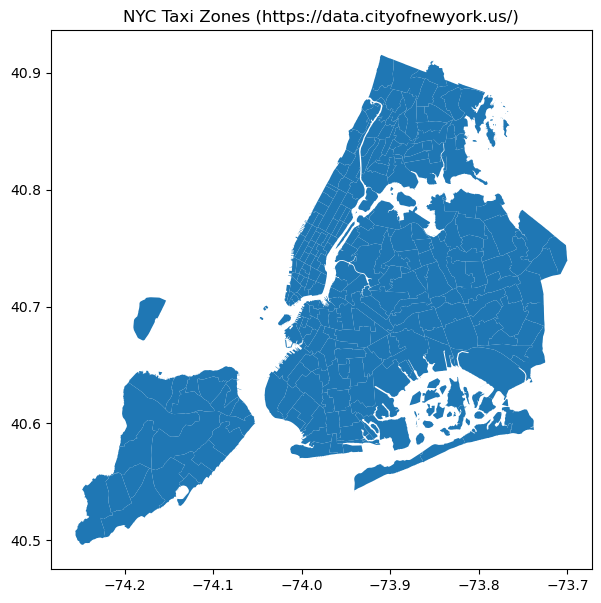

In [12]:
gdf.plot(figsize=(7, 7))
plt.title('NYC Taxi Zones (https://data.cityofnewyork.us/)')
x_limits = plt.gca().get_xlim()
y_limits = plt.gca().get_ylim()

In [13]:
# Ensure the boundary is in the correct CRS (WGS84 - EPSG:4326)
gdf_nyc_boundary = gdf.to_crs(epsg=4326)

In [14]:
# Reproject the boundary to a projected CRS (UTM zone 18N for NYC)
gdf_nyc_boundary_projected = gdf_nyc_boundary.to_crs(epsg=32618)

In [15]:
# Apply a small positive buffer to the NYC boundary in the projected CRS
# buffered_nyc_boundary_projected = gdf_nyc_boundary_projected.buffer(50)
# buffered_nyc_boundary_projected = gdf_nyc_boundary_projected.buffer(100)
buffered_nyc_boundary_projected = gdf_nyc_boundary_projected.buffer(500)  # Buffer in meters, adjust as needed

In [16]:
# Reproject back to WGS84 (EPSG:4326) for further analysis
buffered_nyc_boundary = buffered_nyc_boundary_projected.to_crs(epsg=4326)

In [17]:
# Create GeoDataFrame for pickup and dropoff points
gdf_pickup = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.pickup_longitude, df.pickup_latitude))
gdf_dropoff = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.dropoff_longitude, df.dropoff_latitude))

In [18]:
# Set the correct CRS (WGS84) for pickup and dropoff points
gdf_pickup.set_crs(epsg=4326, inplace=True);
gdf_dropoff.set_crs(epsg=4326, inplace=True);

In [19]:
len(gdf_pickup.index), len(gdf_dropoff.index)

(1166915, 1166915)

In [20]:
gdf_pickup_in_nyc = gpd.sjoin(gdf_pickup, gpd.GeoDataFrame(geometry=buffered_nyc_boundary), predicate='within', how='inner')
gdf_pickup_in_nyc = gdf_pickup_in_nyc[~gdf_pickup_in_nyc.index.duplicated(keep='first')]

gdf_dropoff_in_nyc = gpd.sjoin(gdf_dropoff, gpd.GeoDataFrame(geometry=buffered_nyc_boundary), predicate='within', how='inner')
gdf_dropoff_in_nyc = gdf_dropoff_in_nyc[~gdf_dropoff_in_nyc.index.duplicated(keep='first')]

In [21]:
len(gdf_pickup_in_nyc.index), len(gdf_dropoff_in_nyc.index)

(1166244, 1164332)

In [22]:
gdf_pickup_in_nyc.index.duplicated().sum(), gdf_dropoff_in_nyc.index.duplicated().sum()

(0, 0)

**Index Flow**

`gdf_pickup`: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10

`gdf_pickup_in_nyc`: 1, 2, 3, 4, 5, 6, 7, 8

`gdf_pickup_dropoff_in_nyc`: 1, 2, 3, 4, 5, 6

`gdf_pickup_in_nyc_new`: 1, 2, 3, 4, 5, 6

In [23]:
# Filter rows where both pickup and dropoff points are within NYC
gdf_pickup_dropoff_in_nyc = gdf_pickup_in_nyc[gdf_pickup_in_nyc.index.isin(gdf_dropoff_in_nyc.index)]

In [24]:
# Filter rows where both pickup and dropoff points are outside NYC
gdf_pickup_out_nyc = gdf_pickup[~gdf_pickup.index.isin(gdf_pickup_in_nyc.index)]
gdf_dropoff_out_nyc = gdf_dropoff[~gdf_dropoff.index.isin(gdf_dropoff_in_nyc.index)]

gdf_pickup_dropoff_out_nyc = gdf_pickup_out_nyc[gdf_pickup_out_nyc.index.isin(gdf_dropoff_out_nyc.index)]

In [25]:
# Pickup points inside NYC
gdf_pickup_in_nyc_new = gdf_pickup[gdf_pickup.index.isin(gdf_pickup_dropoff_in_nyc.index)]

# Dropoff points inside NYC
gdf_dropoff_in_nyc_new = gdf_dropoff[gdf_dropoff.index.isin(gdf_pickup_dropoff_in_nyc.index)]

# Pickup points outside NYC
gdf_pickup_out_nyc_new = gdf_pickup[gdf_pickup.index.isin(gdf_pickup_dropoff_out_nyc.index)]

# Dropoff points outside NYC
gdf_dropoff_out_nyc_new = gdf_dropoff[gdf_dropoff.index.isin(gdf_pickup_dropoff_out_nyc.index)]

In [26]:
# %%time
# # running time = 2-5 mins
# add_plot(gdf_pickup_in_nyc_new, gdf_pickup_out_nyc_new, 'Pickup within NYC', 'Pickup outside NYC'
#          , filename='NYC Pickup Locations.png', x_limits=x_limits, y_limits=y_limits)

![nyc pickup locations](img/nyc_pickup_locations.png)

In [27]:
# %%time
# # running time = 2-5 mins
# add_plot(gdf_dropoff_in_nyc_new, gdf_dropoff_out_nyc_new, 'Dropoff within NYC', 'Dropoff outside NYC'
#          , filename='NYC Dropoff Locations.png', x_limits=x_limits, y_limits=y_limits)

![nyc dropoff locations](img/nyc_dropoff_locations.png)

Because `gdf_pickup_in_nyc_new` and `gdf_dropoff_in_nyc_new` differ only in the `geometry` column, we can drop that column and use one of them as the DataFrame.

In [28]:
len(gdf_pickup_in_nyc_new.index), len(gdf_dropoff_in_nyc_new.index)

(1164295, 1164295)

In [29]:
len(gdf_pickup_out_nyc_new.index), len(gdf_dropoff_out_nyc_new.index)

(634, 634)

In [30]:
gdf_pickup_in_nyc_new.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance_osrm,speed_osrm,pickup_datetime_month,pickup_datetime_hour,pickup_datetime_weekday,pickup_datetime_period,dropoff_datetime_month,dropoff_datetime_hour,dropoff_datetime_weekday,dropoff_datetime_period,trip_duration,geometry
0,id0458976,2,1,-73.862762,40.768822,-73.891701,40.746689,N,5.6729,18.025102,6,18,Wednesday,Evening,6,18,Wednesday,Evening,1133,POINT (-73.86276 40.76882)
1,id0434613,2,1,-73.958038,40.783237,-73.975510,40.760853,N,2.9567,12.000135,4,13,Monday,Afternoon,4,13,Monday,Afternoon,887,POINT (-73.95804 40.78324)
2,id3809234,2,1,-73.969460,40.785519,-73.989243,40.771748,N,2.8334,14.869155,5,12,Saturday,Afternoon,5,12,Saturday,Afternoon,686,POINT (-73.96946 40.78552)
3,id1203705,1,1,-73.981743,40.736549,-73.998352,40.726440,N,2.3150,10.188264,5,18,Saturday,Evening,5,18,Saturday,Evening,818,POINT (-73.98174 40.73655)
4,id1896645,2,1,-73.977913,40.752609,-73.975647,40.733139,N,2.9457,11.150915,4,22,Sunday,Night,4,23,Sunday,Night,951,POINT (-73.97791 40.75261)


In [31]:
gdf_dropoff_in_nyc_new.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance_osrm,speed_osrm,pickup_datetime_month,pickup_datetime_hour,pickup_datetime_weekday,pickup_datetime_period,dropoff_datetime_month,dropoff_datetime_hour,dropoff_datetime_weekday,dropoff_datetime_period,trip_duration,geometry
0,id0458976,2,1,-73.862762,40.768822,-73.891701,40.746689,N,5.6729,18.025102,6,18,Wednesday,Evening,6,18,Wednesday,Evening,1133,POINT (-73.89170 40.74669)
1,id0434613,2,1,-73.958038,40.783237,-73.975510,40.760853,N,2.9567,12.000135,4,13,Monday,Afternoon,4,13,Monday,Afternoon,887,POINT (-73.97551 40.76085)
2,id3809234,2,1,-73.969460,40.785519,-73.989243,40.771748,N,2.8334,14.869155,5,12,Saturday,Afternoon,5,12,Saturday,Afternoon,686,POINT (-73.98924 40.77175)
3,id1203705,1,1,-73.981743,40.736549,-73.998352,40.726440,N,2.3150,10.188264,5,18,Saturday,Evening,5,18,Saturday,Evening,818,POINT (-73.99835 40.72644)
4,id1896645,2,1,-73.977913,40.752609,-73.975647,40.733139,N,2.9457,11.150915,4,22,Sunday,Night,4,23,Sunday,Night,951,POINT (-73.97565 40.73314)


In [32]:
type(gdf_pickup_in_nyc_new)

geopandas.geodataframe.GeoDataFrame

In [33]:
outside_nyc = gdf_pickup_out_nyc_new.shape[0] / df.shape[0] * 100
print(f'I have removed {outside_nyc:.2f}% of the data outside the NYC boundary from the pickup and dropoff points in the dataset.')

I have removed 0.05% of the data outside the NYC boundary from the pickup and dropoff points in the dataset.


In [34]:
gdf_pickup_in_nyc_new = gdf_pickup_in_nyc_new.copy()

In [35]:
df = pd.DataFrame(gdf_pickup_in_nyc_new.drop(columns="geometry", axis=1))

In [36]:
type(df)

pandas.core.frame.DataFrame

**trip_duration**

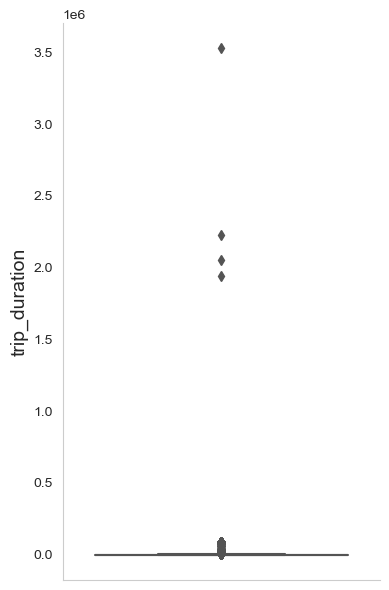

In [37]:
outliers_graph(df, ["trip_duration"])

**maximum trip duration**

In this dataframe below, we observe that one of the trip_duration values is **1,939,736 seconds**, which translates to approximately **22 days**. This is highly unusual for typical taxi trips, as such long durations are likely outliers or data errors. To maintain a more accurate and representative dataset, we should remove these extreme outliers.

In [38]:
df[df["trip_duration"] > 1.5 * 10**6][['id','trip_duration']]

,id,trip_duration
487117,id1325766,2227612
916993,id0053347,3526282
936804,id0369307,2049578
1104710,id1864733,1939736


Let's restrict the maximum trip duration to only one day.

In [39]:
df = df[df["trip_duration"] <= 86400]

In [40]:
# check again
df[df["trip_duration"] > 86400][['id','trip_duration']].count()

id               0
trip_duration    0
dtype: int64

In [41]:
df["trip_duration"].max()

86392

In [42]:
# in hour
df["trip_duration"].max()/3600

23.997777777777777

**minimum trip duration**

For the minimum trip duration, let's limit it to include only trips that are 60 seconds or longer, as trips shorter than 60 seconds are often too brief to be realistic. Such short trips could represent errors, incomplete trips, or anomalies like immediate cancellations or very short distances that are not typical of standard taxi trips. Additionally, since we have derived speed from the trip's duration and distance, any outliers or errors in the trip duration will directly impact the accuracy of the calculated speed.

In [43]:
df[df["trip_duration"] < 60][['id','trip_duration']].count()

id               6535
trip_duration    6535
dtype: int64

In [44]:
df = df[df["trip_duration"] >= 60]

In [45]:
# check again
df[df["trip_duration"] < 60][['id','trip_duration']].count()

id               0
trip_duration    0
dtype: int64

In [46]:
df["trip_duration"].min()

60

**distance_osrm**

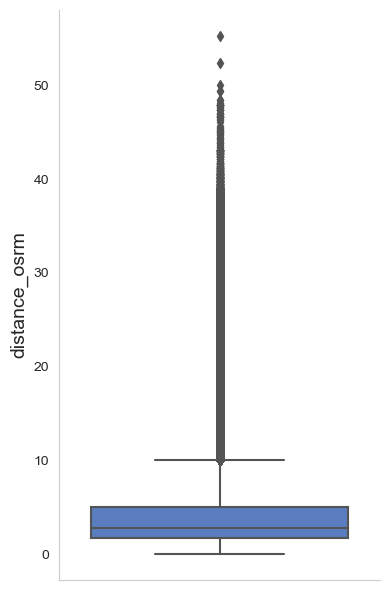

In [47]:
outliers_graph(df, ["distance_osrm"])

I will classify taxi trips with distances less than 100 meters (0.1 km) as outliers and remove them from the dataset. This classification is based on the fact that such distances are highly improbable for a typical taxi ride.

A distance of 100 meters or less is extremely short and may not allow enough time for the taxi to move between passengers, reach the next block, or justify the trip. Additionally, many taxi services have minimum fare policies or distance thresholds, making such short trips unrealistic. Therefore, these observations are likely data entry errors or rare exceptions and should be excluded from further analysis to ensure the accuracy and relevance of the results.

In [48]:
df[df["distance_osrm"] < 0.1][['id','distance_osrm']].count()

id               4506
distance_osrm    4506
dtype: int64

In [49]:
df = df[df["distance_osrm"] >= 0.1]

In [50]:
# check again
df[df["distance_osrm"] < 0.1][['id','distance_osrm']].count()

id               0
distance_osrm    0
dtype: int64

In [51]:
df["distance_osrm"].min()

0.1001

Given New York City's geographic constraints, the maximum distance between its farthest points, such as from the Bronx to Staten Island or JFK Airport, is approximately 50 to 60 km. Therefore, we will restrict the maximum distance to 60 km or less.

In [52]:
df = df[df["distance_osrm"] <= 60]

In [53]:
df["distance_osrm"].max()

55.275400000000005

**speed_osrm**

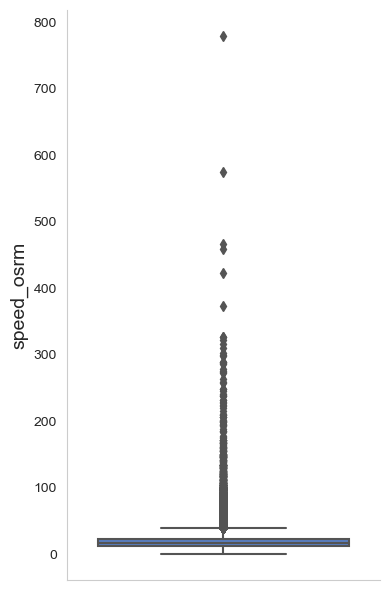

In [54]:
outliers_graph(df, ['speed_osrm'])

**maximum speed**

Since the taxi speed is calculated independently using the formula v = s/t (where speed v is derived from the distance s traveled divided by the trip duration t), we can set a reasonable limit based on safety, legal regulations, and practical vehicle performance.

Speeds above 150 km/h are generally outliers and can be considered unrealistic for the following reasons:
- Safety concerns: Driving at such high speeds significantly increases the risk of accidents. Taxis are typically expected to prioritize passenger safety and comfort over speed.
- Legal restrictions: In most urban and highway environments, speed limits are set well below 150 km/h. Exceeding these limits is illegal and could result in penalties or license suspension for drivers.
- Vehicle design: Standard taxi vehicles are not designed to sustain such high speeds for long periods. Taxi fleets are often chosen for reliability, efficiency, and fuel economy, not high-speed performance.
- Passenger experience: Traveling at excessive speeds can be uncomfortable and undesirable for passengers, making it impractical for taxi drivers to maintain speeds above 150 km/h.

In [55]:
df[df["speed_osrm"] > 150][['id','speed_osrm']].count()

id            93
speed_osrm    93
dtype: int64

In [56]:
df = df[df["speed_osrm"] <= 150]

In [57]:
df[df["speed_osrm"] > 150][['id','speed_osrm']].count()

id            0
speed_osrm    0
dtype: int64

In [58]:
df["speed_osrm"].max()

149.7913043478261

**minimum speed**

I also set the lower bound limit for speed to 5 km/h because speeds below this threshold are likely to represent extreme congestion, prolonged idling, or abnormal conditions such as extended stops, which are not reflective of typical taxi movement patterns in NYC. By setting this limit, I aim to filter out outliers that could skew the analysis of average taxi speeds.

In [59]:
df[df["speed_osrm"] < 5][['id','speed_osrm']].count()

id            15495
speed_osrm    15495
dtype: int64

In [60]:
df = df[df["speed_osrm"] >= 5]

In [61]:
# check again
df[df["speed_osrm"] < 5][['id','speed_osrm']].count()

id            0
speed_osrm    0
dtype: int64

In [62]:
df["speed_osrm"].min()

5.0

---

**Outlier Removal Conclusion**
- I have removed a total of 2.51% of outliers from the dataset to ensure the integrity and accuracy of the analysis.
- A good range for outlier detection typically removes 5-10% of extreme values, depending on the data quality and context. In this case, removing 2.51% of the dataset is appropriate for a large urban taxi system like NYC, where extreme trips (too short, too long, too fast, or too slow) could distort the results. It still retains enough data for a robust analysis of normal taxi operations.

In [63]:
(1166915 - df.shape[0])/1166915*100

2.506952091626211

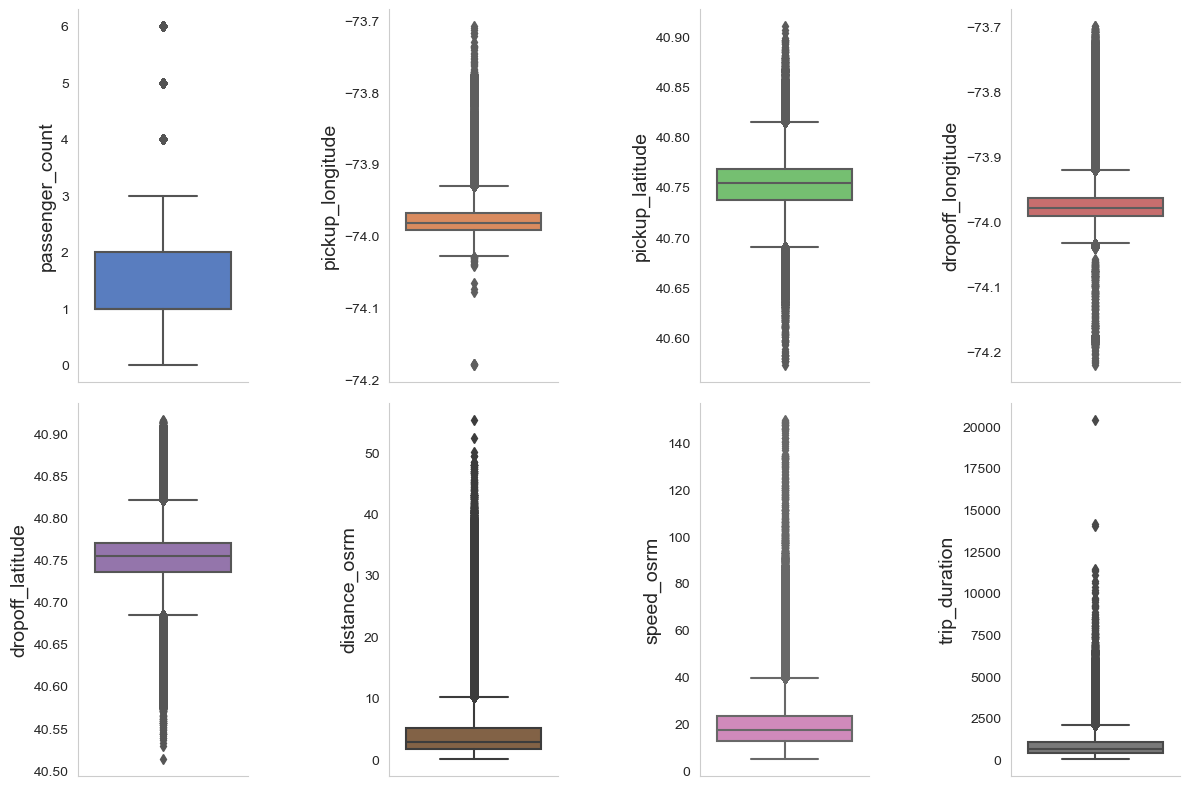

In [64]:
outliers_graph(df, df.columns.to_list())

<div id="detecmisval">
    <div style="font-size:20pt;font-weight:700;padding:20px 0;line-height:1.2">2.5 Detecting and Imputing Missing Values</div>
</div>

In [65]:
df.isnull().sum().sum()

0

---

In [66]:
df.to_csv('train_temp2.csv', index=False) # index=False to avoid saving the index as a column

In [67]:
stop_here = True

if stop_here:
    raise RuntimeError("Execution stopped manually.")

RuntimeError: Execution stopped manually.

For data visualization purposes, there's no need to convert the datatype in this section.

In [2]:
df = pd.read_csv('train_temp2.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137661 entries, 0 to 1137660
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   id                        1137661 non-null  object 
 1   vendor_id                 1137661 non-null  int64  
 2   passenger_count           1137661 non-null  int64  
 3   pickup_longitude          1137661 non-null  float64
 4   pickup_latitude           1137661 non-null  float64
 5   dropoff_longitude         1137661 non-null  float64
 6   dropoff_latitude          1137661 non-null  float64
 7   store_and_fwd_flag        1137661 non-null  object 
 8   distance_osrm             1137661 non-null  float64
 9   speed_osrm                1137661 non-null  float64
 10  pickup_datetime_month     1137661 non-null  int64  
 11  pickup_datetime_hour      1137661 non-null  int64  
 12  pickup_datetime_weekday   1137661 non-null  object 
 13  pickup_datetime_period    1

<div id="edavis">
    <div style="font-size:25pt;font-weight:700;padding:20px 0;line-height:1.2">3. Exploratory Data Analysis (EDA) and Data Visualization</div>
</div>

<div id="addbusobj">
    <div style="font-size:20pt;font-weight:700;padding:20px 0;line-height:1.2">3.1 Addressing Business Objectives</div>
</div>

**1. What are the maximum, minimum, mean, count, and sum of trip durations from 2016?**

**Data Observation**
- Maximum trip duration (before outlier removal) = 3,526,282 seconds = 40 days
- Maximum trip duration (after outlier removal) = 20,400 seconds = 5.67 hours
- Minimum trip duration (before outlier removal)  = 1 second
- Minimum trip duration (after outlier removal)  = 60 seconds
- Mean trip duration (before outlier removal) = 959 seconds = 15.9 minutes
- Mean trip duration (after outlier removal) = 835 seconds = 13.9 minutes
- Total number of trips (Count) = 1,137,661 orders
- Total trip duration (Sum) = 263,903 hours

**Analysis**
- The maximum trip duration drastically reduced from 40 days to 5.67 hours after outlier removal. This suggests that there were extreme values in the data that were likely errors or anomalies, making the trip duration unreasonable for typical taxi trips in a city.
- The minimum trip duration increased from 1 second to 60 seconds after outlier removal. A trip duration of 1 second is not feasible for a real-world scenario, and removing such extreme outliers helps in making the data more realistic.
- The mean trip duration also slightly reduced from 15.9 minutes to 13.9 minutes, indicating that a small portion of the trips had unusually long durations that skewed the average before outlier removal.
- A total of 1,137,661 trips were analyzed, contributing to a total trip duration of 263,903 hours. This provides a substantial amount of data for analysis, giving us confidence in the trends and patterns observed.

**Recommendation**
- Establish a system for regularly monitoring and flagging outliers in the dataset. Trips with extremely long or short durations (such as 40 days or 1 second) should be flagged for further review to ensure data quality and accuracy.
- The presence of extreme outliers indicates potential issues with data collection processes (e.g., errors in trip start or end times). Implementing stricter validation rules at the point of data entry can help prevent these errors from occurring.
- With the average trip duration being 13.9 minutes after cleaning, the company could explore route optimization strategies to reduce trip time further. This would improve customer satisfaction and reduce operational costs.

In [4]:
with pd.option_context('display.float_format', '{:.1f}'.format):
    print(df['trip_duration'].describe())

count   1137661.0
mean        835.1
std         649.1
min          60.0
25%         399.0
50%         661.0
75%        1068.0
max       20400.0
Name: trip_duration, dtype: float64


In [5]:
df['trip_duration'].sum() / 3600

263903.57416666666

**2. What are the maximum, minimum, mean, and sum of distances from 2016?**

**Data Observation**
- Maximum distance (before outlier removal) = 765.644 km
- Maximum distance (after outlier removal) = 55.275 km
- Minimum distance (before outlier removal) = 0 km
- Minimum distance (after outlier removal) = 0.104 km
- Mean distance (before outlier removal) = 4.618 km
- Mean distance (after outlier removal) = 4.667 km
- Total distance traveled (Sum) = 5,309,308 km

**Analysis**
- The maximum distance observed after removing outliers (55.275 km) is significantly more reasonable compared to the initial maximum (765.644 km). Considering New York City's geographic limits, where the distance between the farthest points is approximately 50 to 60 km (e.g., from the Bronx to Staten Island or JFK Airport), the original value of 765.644 km is clearly an anomaly. The adjusted value reflects more realistic taxi trip distances within the city.
- The minimum distance changed from 0 km to 0.104 km. This is likely due to the removal of trips that erroneously recorded zero distance, possibly due to data entry errors or trips that were canceled. The new minimum is more realistic, representing very short trips.
- The mean distance increased slightly from 4.618 km to 4.667 km after outlier removal. This reflects a more accurate representation of typical taxi trip lengths after removing extreme values that were skewing the original calculation.
- The total distance traveled of 5,309,308 km reflects the combined travel distance of all trips in the dataset. These metrics provide a strong baseline for assessing trip frequency and overall demand.

**Recommendation**
- Implement automated outlier detection systems to continuously monitor and filter out unrealistic trip distances, such as the original maximum of 765.644 km. This can improve the accuracy of distance metrics and provide more actionable insights for stakeholders.
- Investigate trips with minimal distances, especially those under 100 meters, to ensure data accuracy. Consider flagging or excluding trips that might be erroneous or result from system errors, such as trips recorded as 0 km due to incorrect GPS readings or cancellations.
- Perform a more in-depth analysis of trips exceeding 60 km to better understand their frequency, origins, and destinations. These may represent rides to airports or neighboring cities, which could be opportunities for targeted promotions or services.

In [6]:
with pd.option_context('display.float_format', '{:.3f}'.format):
    print(df['distance_osrm'].describe())

count   1137661.000
mean          4.667
std           5.364
min           0.104
25%           1.715
50%           2.811
75%           5.103
max          55.275
Name: distance_osrm, dtype: float64


In [7]:
df['distance_osrm'].sum()

5309308.320699997

**3. What are the maximum, minimum, and mean of taxi speeds from 2016?**

**Data Observation**
- Maximum speed (before outlier removal) = 12,246 km/h
- Maximum speed (after outlier removal) = 149 km/h
- Minimum speed (before outlier removal) = 0 km/h
- Minimum speed (after outlier removal) = 5 km/h
- Mean speed (before outlier removal) = 19.489 km/h
- Mean speed (after outlier removal) = 19.351 km/h

**Analysis**
- The maximum speed before outlier removal was 12,246 km/h, which is clearly an unrealistic value for any vehicle, let alone a taxi in an urban environment. After outlier removal, the maximum speed is reduced to 149 km/h. Although 149 km/h is still high, it is more plausible and could be due to a taxi speeding on a highway or expressway, especially during off-peak hours.
- The minimum speed before outlier removal was 0 km/h, which may represent instances where the taxi was stationary for an extended period (e.g., at traffic lights or due to congestion). After outlier removal, the minimum speed increased to 5 km/h, indicating that trips with no meaningful movement have been filtered out. A minimum speed of 5 km/h is reasonable for urban traffic conditions, especially during peak hours or in congested areas.
- The mean speed decreased slightly from 19.489 km/h to 19.351 km/h after removing outliers. This suggests that the presence of extreme values (both high and low speeds) had a small but noticeable effect on the overall distribution. The mean speed of around 19 km/h is typical for taxis in New York City, where traffic, stop-and-go patterns, and speed limits influence overall travel speeds.

**Recommendation**
- The mean speed of 19.351 km/h is consistent with urban traffic conditions. However, strategies such as optimizing routes through real-time traffic data, avoiding known congestion zones, or promoting off-peak travel can help improve average speeds. This can reduce overall trip times and improve fuel efficiency.
- Examining speed variations during different times of day or week can help identify patterns, such as peak-hour traffic bottlenecks or smoother traffic flows at night. This can inform decisions about driver scheduling, route optimization, and pricing strategies for high-demand periods.

In [8]:
with pd.option_context('display.float_format', '{:.3f}'.format):
    print(df['speed_osrm'].describe())

count   1137661.000
mean         19.351
std           9.947
min           5.000
25%          12.644
50%          17.159
75%          23.346
max         149.791
Name: speed_osrm, dtype: float64


**4. Do trip duration and distance have a linear relationship, such as v = s/t (where t is proportional to s)?**

**Analysis**
- The relationship between trip duration and distance does not follow a strictly linear pattern as would be expected from the equation v = s/t (where s is distance and t is time). Instead, there is a triangular distribution where trip duration increases with distance up to a certain point (around 20-30 km). After this, the spread become more scattered and less predictable.
- The absence of a strictly linear relationship between distance and time suggests that as trip distances grow, the average speed might fluctuate significantly. Factors like congestion, traffic signals, and road conditions in urban settings likely play a major role in slowing down trips, especially at peak distances.
- For distances under 20 km, there is considerable variability in trip duration. Trips of similar distances show widely differing durations, indicating the influence of external factors such as traffic, road conditions, weather, or driver behavior.
- There is a significant density of points with durations less than 1 hour (up to ~3,600 seconds) and distances between 10 and 30 km, indicating that most trips fall within this range.
- For distances above 30 km, there are fewer data points, and the duration tends to decrease in density, possibly because of fewer long-distance trips or because efficient routes are used for these longer journeys.
- There are some notable outliers for trips exceeding 3 hours or covering distances greater than 40 km. These could be long-haul trips influenced by significant disruptions, such as accidents, road closures, or weather conditions. 

**Recommendation**
- Given the non-linear relationship between trip duration and distance, optimizing route suggestions using sophisticated routing algorithms that incorporate real-time traffic data and predictive analytics could help improve trip efficiency, particularly for longer routes.
- The clustering of trips between 10 and 30 km presents an opportunity for operational focus. Enhancing services and optimizing routes within this core distance could have the greatest impact on improving efficiency and customer satisfaction.

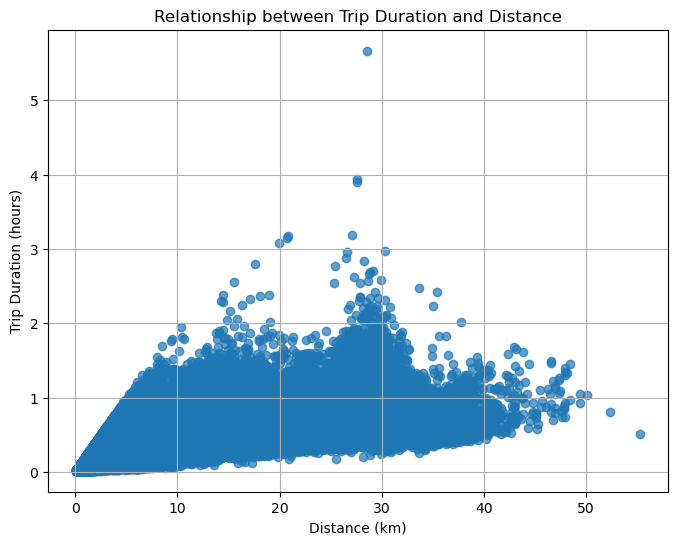

In [9]:
plot_trip_duration_vs_distance(df)

**5. Which vendor had the largest number of trip duration in 2016?**

**Analysis**
- Vendor 2, because they had 141,739 hours of total trip duration, while Vendor 1 only had 122,165 hours of total trip duration.

**Recommendation**
- Given the largest number of trip durations associated with Vendor 2, it may be beneficial for the company to further investigate the factors contributing to this difference. Analyzing aspects such as route efficiency, driver behavior, and customer preferences could provide insights into optimizing trip durations. Additionally, consider exploring partnerships with Vendor 2 for improved service offerings, or assess whether Vendor 1 can implement strategies to enhance their trip durations.

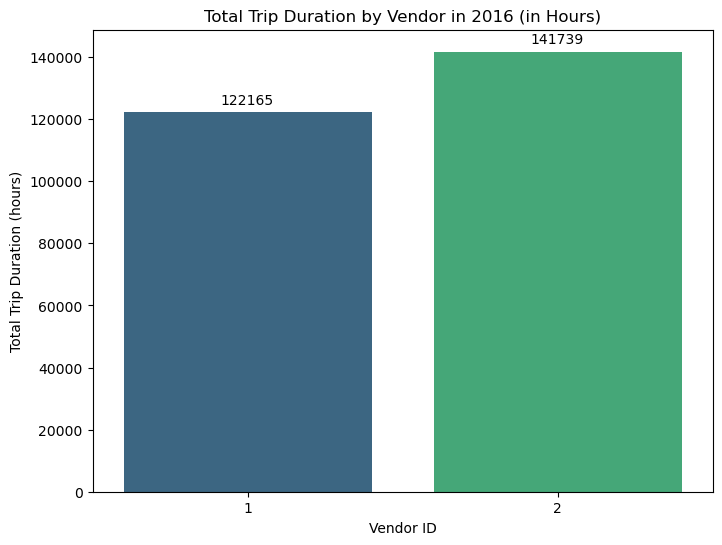

In [10]:
plot_vendor_trip_duration(df)

**6. Which vendor had the larger total distance in 2016?**

**Analysis**
- Vendor 2 outperformed Vendor 1 in terms of total distance traveled, covering 2,867,505 kilometers, while Vendor 1 covered 2,441,803 kilometers. This gap suggests that Vendor 2 managed a higher volume of trips or covered longer distances per trip during the year.
- Vendor 2's total distance is approximately 17.43% greater than that of Vendor 1.

**Recommendation**
- Since Vendor 2 has a higher total distance, it's crucial to investigate the factors contributing to this difference. Consider evaluating their operational efficiency, driver performance, and fleet size. Understanding their processes could offer insights into improving Vendor 1’s performance.
- While Vendor 2 covers more distance, it is important to check whether this leads to proportionally higher revenues or if it introduces higher operational costs. Profitability should not be compromised by merely increasing distance.

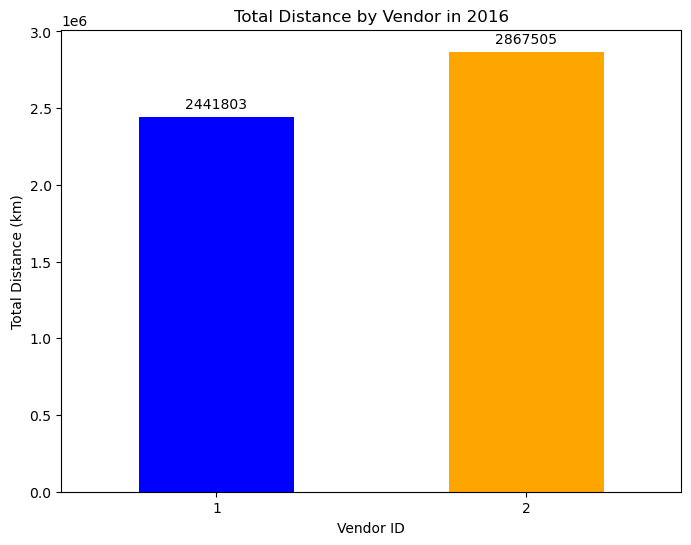

In [11]:
plot_total_distance_by_vendor(df)

**7. What are the average taxi speeds for each vendor in 2016?**

**Analysis**
- Vendor 2 demonstrates a slightly higher average speed (19.39 km/h) compared to Vendor 1 (19.31 km/h). This difference, though small, could indicate minor variations in factors like traffic conditions, driver behavior, route optimizations, or geographical coverage.
- The combined average speed for both vendors is 19.35 km/h, which aligns closely with both individual vendors' speeds, showing a general consistency in operational performance.

**Recommendation**
- Comparing the average speed of 19.35 km/h with industry standards or peer companies could help determine whether this performance is competitive. If it is below the industry average, consider strategies to improve speed without compromising service quality.
- Ensure that increasing speeds does not compromise passenger safety or comfort. Monitoring safety metrics alongside speed improvements is crucial to maintaining a positive customer experience.

In [12]:
avg_speed_all_vendors = df['speed_osrm'].mean()
avg_speed_all_vendors = pd.DataFrame({'Average Speed (km/h) (All Vendors) ': [avg_speed_all_vendors]})
avg_speed_all_vendors

,Average Speed (km/h) (All Vendors)
0,19.350885


In [13]:
average_speeds = df.groupby('vendor_id')['speed_osrm'].mean().reset_index()
average_speeds.columns = ['Vendor ID', 'Average Speed (km/h)']
average_speeds

,Vendor ID,Average Speed (km/h)
0,1,19.307762
1,2,19.388464


**8. How many taxi trips were made by each vendor in 2016?**

**Analysis**
- Number of trips = 1,137,661
- Number of Taxi trips per Vendor:
    - Vendor 1: 529,755
    - Vendor 2: 607,906

**Recommendation**
- Vendor 2 is also leading in the number of trips taken, suggesting a higher demand or possibly better availability. Understanding the reasons for Vendor 2's higher trip volume could provide insights into effective strategies that can be implemented across both vendors.

In [14]:
total_trips_all_vendors = df['id'].count()
total_trips_all_vendors = pd.DataFrame({'Total Trips (All Vendors)': [total_trips_all_vendors]})
total_trips_all_vendors

,Total Trips (All Vendors)
0,1137661


In [15]:
taxi_trips = df.groupby('vendor_id')['id'].count().reset_index()
taxi_trips.columns = ['Vendor ID', 'Total Trips']
taxi_trips

,Vendor ID,Total Trips
0,1,529755
1,2,607906


**9. How many taxi trips were there for any trip that was either ordered (pickup) or completed (drop-off) within a 24-hour period in 2016?**

**Analysis**
- The data reveals that the highest number of taxi trips were ordered (pickup) at 18:00 (70,822 trips) and completed (dropoff) at 19:00 (73,212 trips). This suggests that the worst traffic congestion likely occurs between 18:00 and 19:00. After 19:00, the number of trips begins to gradually decrease, though it remains relatively high until around 22:00. This trend reflects typical evening rush hour patterns, where people are heading home or to evening activities, resulting in increased demand for taxis.
- The fewest taxi trips were ordered (pickup) at 05:00 (11,689 trips) and completed (dropoff) around the same time with 10,920 trips. This suggests that during early morning hours, particularly between 01:00 and 06:00, the traffic is at its lowest, likely due to fewer commuters and lower demand for transportation services. After 06:00, there is a noticeable increase in the number of trips, which steadily rises until the evening peak at 19:00.

**Recommendation**
- To accommodate the higher demand between 18:00 and 22:00, we should consider deploying more taxis during this time. This could reduce wait times for customers and enhance service satisfaction.
- Implementing higher fares during peak traffic hours can help manage the increased demand and ensure a sufficient supply of taxis. By raising the fare during high-demand periods (like 18:00 to 22:00), the company can incentivize more drivers to be on the road and offset the impact of longer trip durations caused by traffic congestion.
- Encourage more taxi usage during off-peak hours through promotions or discounts. For example, offering early morning commuters or late-night travelers discounted fares might help boost ridership during quieter periods.

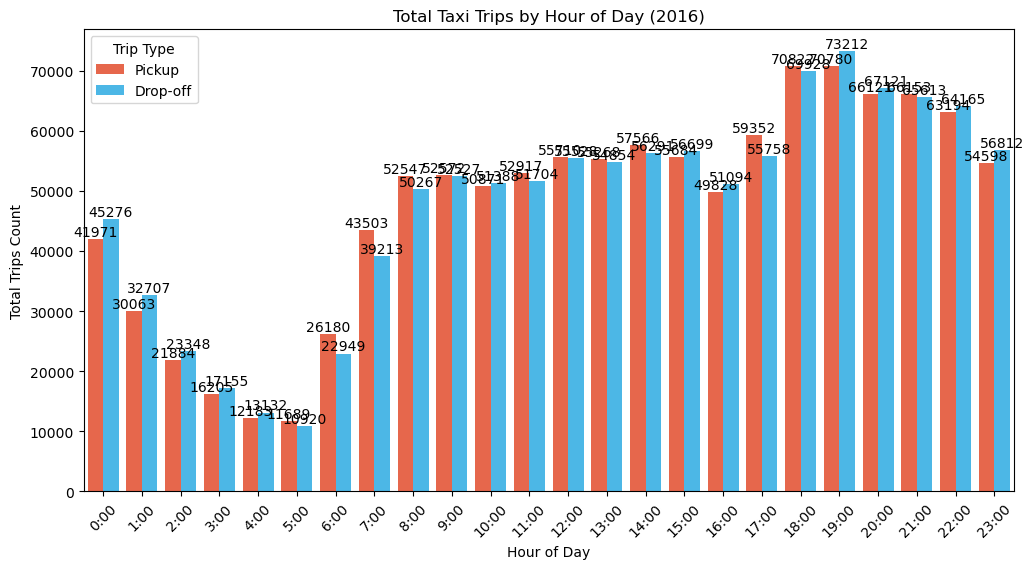

In [16]:
plot_trip_counts_by_hour(df)

In [17]:
pickup_count = df.groupby(df['pickup_datetime_hour'])['id'].count().reset_index()
pickup_count.rename(columns={'id': 'pickup_count', 'pickup_datetime_hour': 'hour'}, inplace=True)

dropoff_count = df.groupby(df['dropoff_datetime_hour'])['id'].count().reset_index()
dropoff_count.rename(columns={'id': 'dropoff_count', 'dropoff_datetime_hour': 'hour'}, inplace=True)

hourly_counts = pd.concat([pickup_count.set_index('hour'), dropoff_count.set_index('hour')], axis=1).reset_index()
hourly_counts

,hour,pickup_count,dropoff_count
0,0,41971,45276
1,1,30063,32707
2,2,21884,23348
3,3,16205,17155
4,4,12183,13132
5,5,11689,10920
6,6,26180,22949
7,7,43503,39213
8,8,52547,50267
9,9,52572,52527


**10. How many taxi trips were there for any trip that was either ordered (pickup) or completed (drop-off) during different parts of the day in 2016?**

**Analysis**
- The highest number of taxi trips were ordered (pickup) during the morning hours between 06:00 and 12:00, totaling 278,590 pickups, with 268,048 drop-offs. This shows a peak in demand during morning commuting hours, likely due to people heading to work or appointments.
- The lowest number of taxi trips were ordered (pickup) during the early morning hours between 00:00 and 06:00, with 133,995 pickups and 142,538 drop-offs. The higher number of drop-offs suggests that many trips started before midnight or that early morning trips are more for getting passengers home after late-night activities.
- The afternoon hours (12:00 to 16:00) show a slight drop in demand compared to the morning, with 224,228 pickups and 223,372 drop-offs. Demand during this period is stable but less intense than in other parts of the day.
- The evening (16:00 to 20:00) and night (20:00 to 24:00) hours have almost equal taxi activity. Evening pickups totaled 250,782 with 249,992 drop-offs, while night pickups totaled 250,066 with 253,711 drop-offs. This consistency across evening and night suggests sustained demand after work and into the later hours, possibly for social or leisure activities.

**Recommendation**
- Increase taxi availability during the morning hours (06:00 - 12:00) to accommodate the highest demand. Ensuring more drivers are available during this time will help reduce wait times and improve service.
- Maintain steady availability of taxis throughout the evening (16:00 - 20:00) and night (20:00 - 24:00), as demand remains consistently high. Focus on key areas such as business districts and entertainment zones to meet the steady demand for both pickups and drop-offs.
- Reduce fleet deployment during the early morning hours (00:00 - 06:00) as demand is significantly lower, but maintain a presence to cover essential trips, such as late-night returns or airport runs.
- Optimize driver shifts in the afternoon (12:00 - 16:00) when demand is stable but not as high. Implement flexible scheduling to ensure a balanced fleet throughout the day while preparing for peak periods in the evening and night.

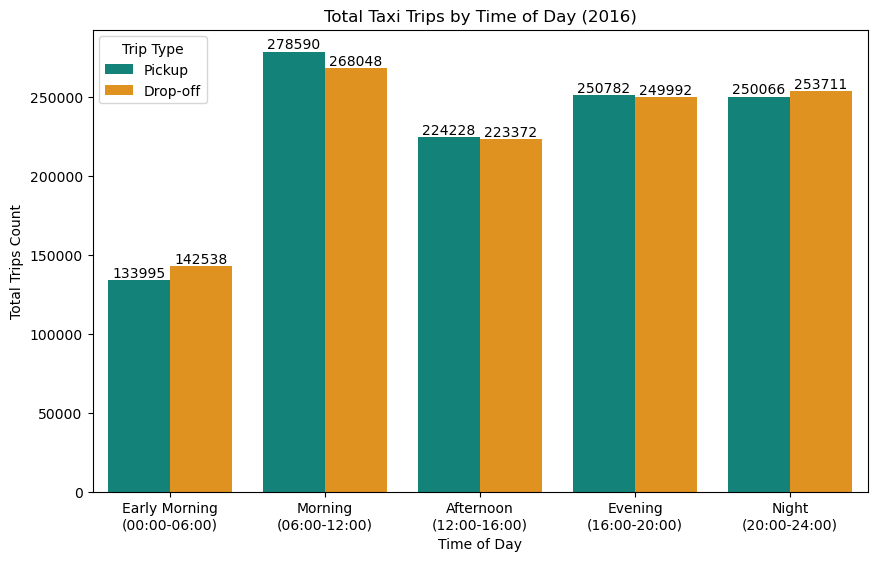

In [18]:
plot_taxi_trips_by_time_of_day(df)

**11. How many taxi trips were there on weekdays in 2016?**

**Analysis**
- The demand for taxi trips gradually increases from Monday (146,637 trips) to Friday (174,375 trips), indicating that the demand builds up throughout the workweek, reaching its peak on Friday. This suggests that as the week progresses, people engage in more activities that require transportation, such as business meetings, social events, or weekend preparation.
- After Friday's peak, the number of trips slightly decreases on Saturday (172,401 trips), though demand remains high over the weekend.
- A more significant decrease is observed on Sunday (152,876 trips), as the weekend comes to an end and people likely prepare for the upcoming workweek.
- The cycle restarts on Monday, with the lowest demand of the week, and the pattern repeats itself.

**Recommendation**

- Monitor the trend of increasing demand from Monday to Friday and ensure that the number of available taxis scales up gradually throughout the week. This can be achieved by scheduling additional drivers or adjusting vehicle dispatch based on demand forecasts.
- The decrease in demand after Friday suggests that while taxi services are still needed on the weekend, there is slightly less pressure compared to Friday. Use this insight to balance taxi availability accordingly: maintain high availability on Saturdays, but slightly reduce the fleet for Sunday, as demand drops significantly before the new workweek begins.

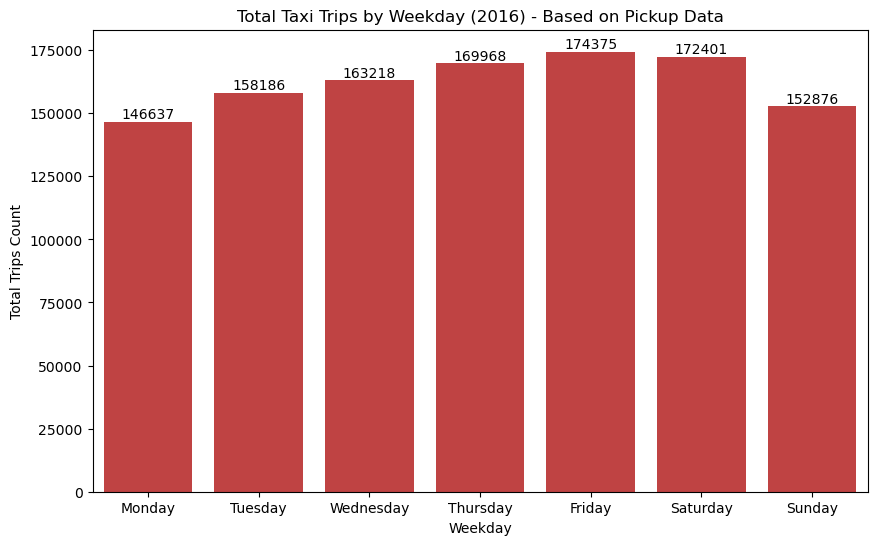

In [19]:
plot_pickup_by_weekday(df)

**12. How many taxi trips were there each month in 2016?**

**Analysis**
- The highest number of taxi trips occurred in March (200,467 trips), followed by April (196,111 trips). The lowest number of trips happened in January (179,668 trips).
- There is a steady increase in the number of taxi trips from January to March, followed by a gradual decline from April to June.
- From the dataframe, there are 0 pickups in July, which means no new rides started in July based on the dataset.
- From the dataframe, there are 93 dropoffs in July, meaning that these rides began in late June and ended in July.

**Recommendation**
- Since there is a clear increase in demand from January to March, implementing targeted marketing campaigns in the early months of the year can help capture more customers and boost revenue.
- Given the fluctuation in taxi trip demand, consider implementing dynamic pricing to maximize profits during peak months like March. This can help capitalize on increased demand and manage supply more efficiently.
- Conduct further analysis to understand why demand peaks in March and decreases afterward. Understanding the drivers behind these trends (e.g., weather, events, or holidays) will help in predicting future demand and developing proactive strategies.

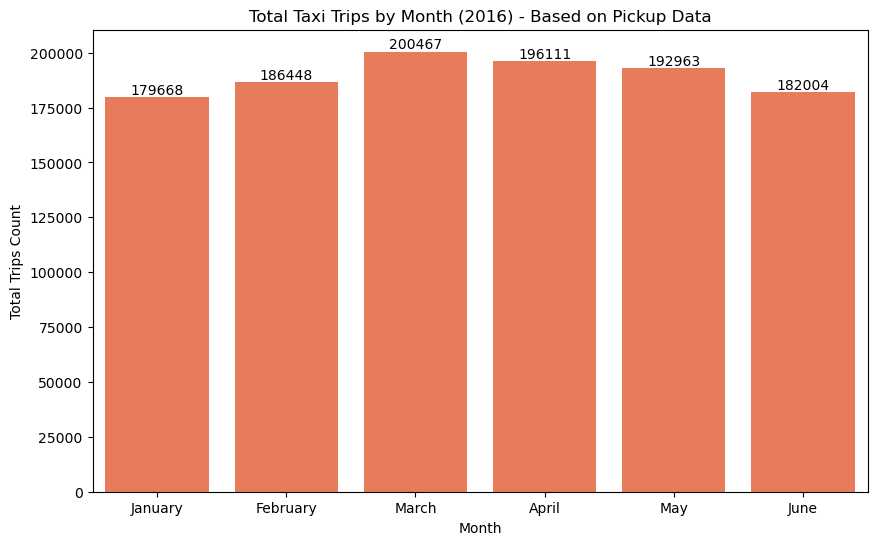

In [20]:
plot_pickup_by_month(df)

In [21]:
pickup_july = df[df["pickup_datetime_month"]==7]["pickup_datetime_month"].count()
print(pickup_july)

0


In [22]:
dropoff_july = df[df["dropoff_datetime_month"]==7]["dropoff_datetime_month"].count()
print(dropoff_july)

93


**13. What was the average distance covered by taxis for trips that were either ordered (pickup) or completed (drop-off) within a 24-hour period in 2016?**

**Analysis**
- The longest average distances for both pickup (7.52 km) and drop-off (7.14 km) occur at 05:00. The second-highest average trip distance happens at 04:00, with 6.70 km for pickups and 6.36 km for drop-offs.
- The shortest distances are observed between 08:00 and 12:00, where the average distance for pickups and drop-offs hovers around 4-5 km. For instance, at 09:00, the average pickup distance is 4.00 km, and the drop-off distance is 4.13 km.
- Early morning hours between 00:00 and 06:00 exhibit relatively long trips, especially between 03:00 and 06:00, where the average distance stays between 5.13 km and 7.52 km.
- Nighttime trips from 20:00 to 23:00 show a gradual increase in distance, ranging from 4.57 km to 5.37 km for both pickup and drop-off locations. This indicates a consistent demand during these hours.

**Recommendation**
- The highest average trip distances occur during early morning trips (04:00 - 06:00), indicating a surge in longer-distance travel. The company could optimize fleet allocation and driver availability during these hours to maximize service efficiency and revenue. Marketing campaigns could target customers who frequently book long-distance rides during this period, potentially promoting special fares for extended trips.
- Between 08:00 and 12:00, there is a lower average trip distance, indicating shorter trips. The company can explore ways to increase trip frequency or optimize pricing for short-distance travel to boost profitability. Offering promotions for quick rides or bundling services during these hours could attract more customers for shorter trips.

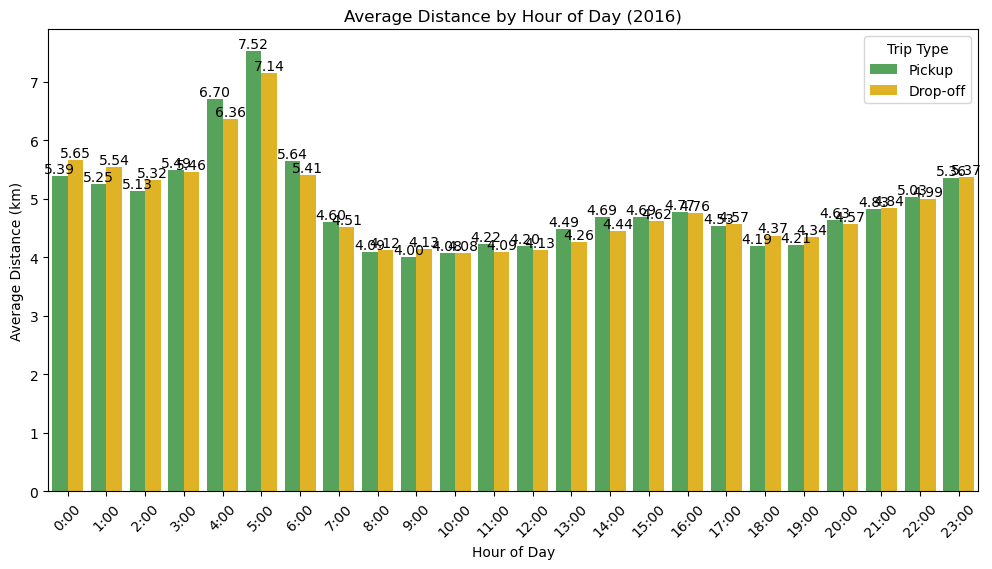

In [23]:
plot_average_distance_covered_by_hour(df)

In [24]:
pickup_distances = df.groupby('pickup_datetime_hour')['distance_osrm'].mean().reset_index()
pickup_distances.rename(columns={'distance_osrm': 'pickup distance', 'pickup_datetime_hour': 'hour'}, inplace=True)

dropoff_distances = df.groupby('dropoff_datetime_hour')['distance_osrm'].mean().reset_index()
dropoff_distances.rename(columns={'distance_osrm': 'dropoff distance', 'dropoff_datetime_hour': 'hour'}, inplace=True)

hourly_distances = pd.concat([pickup_distances.set_index('hour'), dropoff_distances.set_index('hour')], axis=1).reset_index().round(2)
hourly_distances

,hour,pickup distance,dropoff distance
0,0,5.39,5.65
1,1,5.25,5.54
2,2,5.13,5.32
3,3,5.49,5.46
4,4,6.70,6.36
5,5,7.52,7.14
6,6,5.64,5.41
7,7,4.60,4.51
8,8,4.09,4.12
9,9,4.00,4.13


**14. What was the average speed of taxis within a 24-hour period in 2016?**

**Analysis**
- Speeds are higher in the early morning hours (00:00 - 06:00), especially between 04:00 and 06:00. The highest average speed for both pickup and drop-off trips occurs at 05:00, with a speed of 33.29 km/h for pickups and 33.01 km/h for drop-offs.
- Between 00:00 and 03:00, the speeds remain relatively high, ranging from 23.56 km/h to 26.63 km/h, indicating low traffic during these hours.
- Speeds begin to decline sharply starting from 07:00, where a notable decrease to around 21.06 km/h for pickups and 22.36 km/h for drop-offs occurs.
- By 08:00, the speeds drop further to 17.41 km/h for pickups and 17.94 km/h for drop-offs, showing the impact of morning rush hour traffic.
- The taxi speeds remain relatively low between 08:00 and 19:00, fluctuating between 16.31 km/h and 18.18 km/h. This suggests moderate traffic conditions during this period. The speeds stay stable, with minor differences between pickup and drop-off speeds.
- There is a noticeable increase in speed starting from 20:00, where the average speed rises from 19.77 km/h to 22.53 km/h by 23:00. The improvement in speeds toward the end of the day indicates less congestion during nighttime hours.

**Recommendation**
- Based on the speed trends, taxi services should increase the number of available drivers during low-speed periods, particularly between 08:00 and 19:00. These hours experience lower average speeds, indicating traffic congestion and potentially higher demand for taxis.
- The data suggest that traffic congestion is a significant factor affecting taxi trip durations, particularly between 08:00 and 19:00. Collaborating with local traffic authorities to identify congestion hotspots and optimize routes could help improve taxi trip durations.

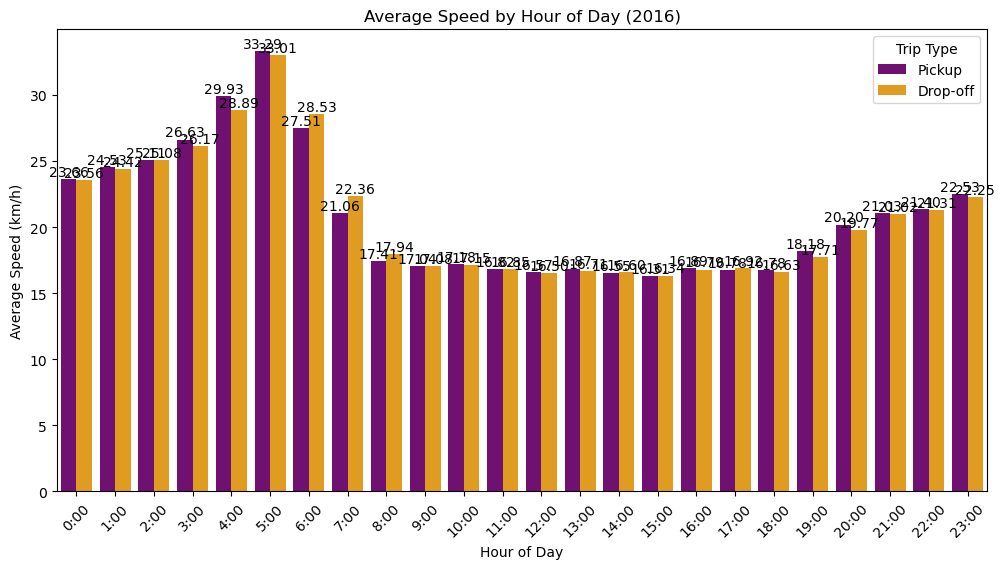

In [25]:
plot_average_speed_by_hour(df)

In [26]:
pickup_speeds = df.groupby('pickup_datetime_hour')['speed_osrm'].mean().reset_index()
pickup_speeds.rename(columns={'speed_osrm': 'pickup speed', 'pickup_datetime_hour': 'hour'}, inplace=True)

dropoff_speeds = df.groupby('dropoff_datetime_hour')['speed_osrm'].mean().reset_index()
dropoff_speeds.rename(columns={'speed_osrm': 'dropoff speed', 'dropoff_datetime_hour': 'hour'}, inplace=True)

hourly_speeds = pd.concat([pickup_speeds.set_index('hour'), dropoff_speeds.set_index('hour')], axis=1).reset_index().round(2)
hourly_speeds

,hour,pickup speed,dropoff speed
0,0,23.66,23.56
1,1,24.53,24.42
2,2,25.11,25.08
3,3,26.63,26.17
4,4,29.93,28.89
5,5,33.29,33.01
6,6,27.51,28.53
7,7,21.06,22.36
8,8,17.41,17.94
9,9,17.04,17.08


**15. Was the number of passengers related to trip duration?**

**Analysis**
- The majority of the trips are for a single passenger (806,069 trips), with a significant drop for two-passenger trips (164,375 trips), and further decreases for trips with more passengers. The fewest trips occur with four passengers (22,063 trips) and zero passengers (11 trips).
- There doesn't appear to be a strong direct correlation between the number of passengers and the trip duration. The range of trip durations seems relatively similar across different passenger counts. The duration varies significantly within each passenger count category. For example, for one-passenger trips, trip durations range from a few seconds up to over 20,000 seconds. This trend is mirrored in other passenger counts. There is no clear pattern suggesting that an increase in the number of passengers results in longer or shorter trip durations.
-  Outliers are present across all passenger counts, with some trips having unusually long durations (above 10,000 seconds). This could suggest external factors (such as traffic, trip distance, or other non-passenger-related factors) that may have more influence on trip duration.
- The data includes 11 trips with zero passengers, which is highly unusual and could indicate data quality issues (e.g., incorrect recording, cancellation after pickup, test or maintenance trips, or technical glitches). These trips should be investigated further.
- Trips with 3-6 passengers still show a wide range of trip durations, despite being a relatively smaller portion of the total trips.

**Recommendation**
- While the number of passengers doesn't seem to significantly influence trip duration, other factors like time of day, weather, or traffic congestion might have a stronger relationship with trip duration. These variables should be included in the next phase of analysis to identify any key drivers behind trip duration.
- If multi-passenger trips are less frequent, the company might consider optimizing resource allocation for one-passenger and two-passenger trips, which dominate the dataset. This could include dynamic pricing models, fleet management strategies, or promotions targeted towards solo riders.

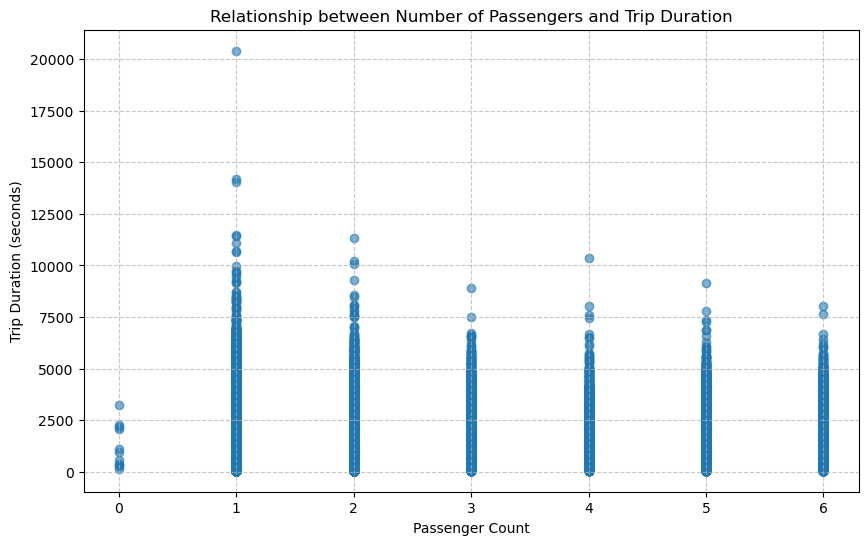

In [27]:
plot_passenger_trip_duration(df)

In [28]:
df["passenger_count"].value_counts()

1    806069
2    164375
5     60882
3     46627
6     37634
4     22063
0        11
Name: passenger_count, dtype: int64

**16. Did the number of passengers relate to the available vendors?**

**Analysis**
- The majority of trips (both for Vendor 1 and Vendor 2) are for a single passenger. Vendor 1 handles slightly more trips than Vendor 2, with around 429,830 trips compared to 376,239 trips for Vendor 2. This dominance suggests that individual travel is the most common use case, which is typical in urban taxi services.
- There is a noticeable drop in trip counts for both vendors when there are two passengers, but Vendor 2 surpasses Vendor 1 in this segment. Vendor 2 has 92,105 trips, while Vendor 1 has 72,270 trips. This might indicate that Vendor 2 may have better offers or services catering to small groups of passengers.
- The trip count for three and four passengers continues to decrease significantly, with Vendor 2 still having a slightly larger share than Vendor 1. These low numbers suggest that larger groups seldom use taxis for commuting or that taxis have limited seating capacity.
- For 5 passengers, Vendor 2 dominates this category, with 60,618 trips, while Vendor 1 has a mere 264 trips. For 6 passengers, Vendor 2 again significantly leads, with 37,513 trips versus 121 trips for Vendor 1. This wide disparity suggests that Vendor 2 may offer larger-capacity vehicles, such as vans or SUVs, more frequently than Vendor 1.

**Recommendation**
- Vendor 1 should consider expanding its fleet to include more vehicles that can accommodate larger groups, especially vans or SUVs. This will allow them to better compete with Vendor 2 in the 5-6 passenger segments, where they are severely underperforming.
- Vendor 2 should continue to capitalize on its advantage in serving larger groups but may want to optimize its services for solo passengers, where it currently lags behind Vendor 1.

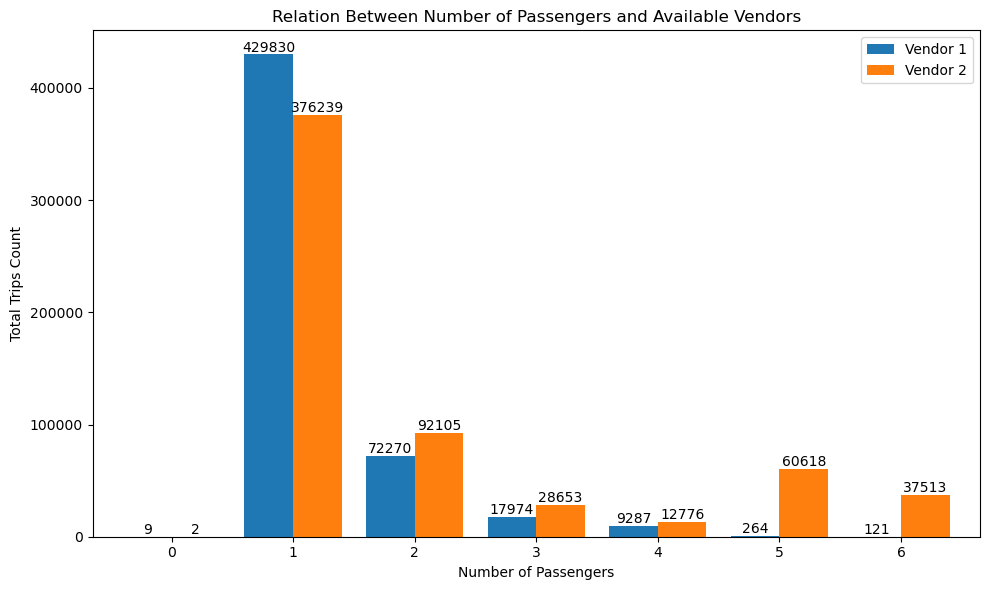

In [29]:
plot_passenger_vendor(df)

**17. What was the operational area for taxi trips in 2016?**

**A. City-Level Analysis**

**New York City (NYC):**
- **Pickup Points**: 
  - High concentration around central Manhattan, Midtown, and Financial District.
  - Notable pickup activity in Brooklyn, specifically Downtown Brooklyn and Williamsburg.
  - High pickup activity near airports such as JFK and LaGuardia in Queens.
- **Dropoff Points**: 
  - Dropoff activity mirrors pickup points with strong presence in Midtown and Financial District.
  - Brooklyn continues to see significant dropoff in Downtown Brooklyn, with moderate activity in Williamsburg.
  - Dropoff activity also concentrated around airports like JFK and LaGuardia in Queens.

**New Jersey:**
- **Pickup Points**: 
  - Strong activity in northern New Jersey, particularly around Jersey City, Newark, and Paterson.
  - Lower activity in suburban regions and further from the city center.
- **Dropoff Points**: 
  - Dropoff activity remains concentrated around Jersey City, Newark, and Paterson with lower activity in more suburban areas.

**Long Island:**
- **Pickup Points**: 
  - Pickup activity is primarily focused on areas near NYC, such as Hempstead and areas close to the city, with sparse activity further east.
- **Dropoff Points**: 
  - Similar dropoff trends in suburban Long Island near NYC-adjacent areas, especially Hempstead and Massapequa.
  - Limited dropoff in distant eastern Long Island.

**B. District-Level Analysis**

**Manhattan:**
- **Pickup Points**: 
  - Highest density of pickup points in Midtown and Financial District.
- **Dropoff Points**: 
  - Similar trends in dropoff locations, with concentration extending from Midtown into the Financial District.

**Brooklyn:**
- **Pickup Points**: 
  - High concentration in Downtown Brooklyn, Williamsburg, and Brooklyn Heights.
- **Dropoff Points**: 
  - Strong dropoff activity, especially in Downtown Brooklyn and Brooklyn Heights.

**Queens:**
- **Pickup Points**: 
  - Significant activity around airports like JFK and LaGuardia, with moderate pickup throughout the borough.
- **Dropoff Points**: 
  - Dropoff activity follows pickup trends, especially around JFK and LaGuardia.

**C. Inter-City and Airport Connections**

- **Airport Pickup and Dropoff**: 
  - JFK and LaGuardia continue to be hubs for pickups and dropoffs. 
  - Newark Liberty International Airport shows consistent pickup and dropoff activity for New Jersey commuters.
  
- **NYC-New Jersey Commuter Flow**: 
  - Heavy commuter traffic between Jersey City, Newark, and Manhattan, with strong pickup and dropoff activity in these regions.

**D. Suburban Analysis (Long Island, NJ, and Westchester)**

**Long Island:**
- **Pickup and Dropoff Points**: 
  - Concentrated around NYC suburbs like Hempstead and Massapequa. 
  - Sparse activity in more distant suburban and rural areas of Long Island.

**New Jersey:**
- **Pickup and Dropoff Points**: 
  - High activity in areas close to NYC, especially near Jersey City and Newark.
  - Minimal activity in more suburban areas and distant towns.

**Westchester:**
- **Pickup and Dropoff Points**: 
  - Moderate pickup and dropoff activity in White Plains and Yonkers, with sparse activity in northern regions.

**E. Heat Map Analysis**

- **Core Activity**: 
  - Highest density in Manhattan, particularly in Midtown and Financial District. 
  - Brooklyn, Jersey City, and Newark also show significant pickup and dropoff activity.
  
- **Peripheral Activity**: 
  - Sparse activity in suburban regions such as Long Island, northern New Jersey, and Westchester County, particularly in more distant areas.

**Recommendation**

* Optimize Operations in High-Demand Areas: 
   - Focus on enhancing vehicle availability in Manhattan, especially in Midtown and Financial District.
   - Improve real-time dispatching to minimize wait times during peak hours.

* Strengthen Airport Connectivity: 
   - Enhance coordination between JFK, LaGuardia, and Newark airports, with dedicated services for pickups and dropoffs.
   - Collaborate with airlines to offer integrated passenger services.

* Expand Suburban Fleet: 
   - Increase operations in suburban areas like Long Island and Westchester with flexible service models.
   - Consider adjusting pricing structures for long-distance rides.

* Improve Cross-State Commuter Services: 
   - Enhance NJ fleet coordination to handle high commuter traffic.
   - Prioritize transit hubs for improved accessibility and frequent traveler benefits.

**New York City Map**

![New York City Map](img/nyc_map.png)

**Pickup point (heatmap + markers)**

![Pickup Heatmap Marker](img/pickup_heatmap_marker.png)

**Dropoff point (heatmap + markers)**

![Dropoff Heatmap Marker](img/dropoff_heatmap_marker.png)

**Pickup point (markers)**

![Pickup Marker](img/pickup_marker.png)

**Dropoff point (markers)**

![Dropoff Marker](img/dropoff_marker.png)

In [30]:
# df_map_test = df.copy()

In [31]:
# df_map_test = df_map_test.head(1000)

In [32]:
# pickup_heatmap = create_heatmap(df_map_test, 'pickup_point', 'pickup_heatmap')
# dropoff_heatmap = create_heatmap(df_map_test, 'dropoff_point', 'dropoff_heatmap')

In [33]:
# %%time
# # running time = 30-60 mins
# pickup_heatmap = create_heatmap(df, 'pickup_latitude', 'pickup_longitude', 'pickup_heatmap')

In [34]:
# %%time
# # running time = 30-60 mins
# dropoff_heatmap = create_heatmap(df, 'dropoff_latitude', 'dropoff_longitude', 'dropoff_heatmap')

**18. Which areas allowed taxis to send data in real-time?**

**A. City Level Analysis**
- **New York City**: The map shows data transmission activities concentrated in parts of Manhattan, Brooklyn, and Queens. These areas might face network congestion due to the clustering of data activities, which can affect real-time transmission.

**B. Sub-District Level Analysis**
- **Manhattan**: The central parts of Manhattan, particularly near Midtown and surrounding areas, exhibit high instances of data activities. This indicates potential data transmission delays due to high demand.
- **Brooklyn**: Regions around Downtown Brooklyn show significant activities, indicating possible challenges with real-time data management. The areas near the southern coast also have notable data activities.
- **Queens**: Areas in western Queens, near the border with Manhattan, show moderate data activity, suggesting localized transmission challenges.
- **Staten Island**: The map shows minimal data transmission activities in Staten Island, indicating stable network conditions with low congestion.
- **Bronx**: This borough shows lower data activities overall, indicating fewer network constraints compared to other areas of NYC.

**C. Specific Areas of Concern**
- High-density data transmission zones are mainly observed in Midtown Manhattan, Downtown Brooklyn, and parts of Queens. These regions might experience slower real-time data communication due to network strain.
- Data activities near the coastal areas of Brooklyn suggest potential network challenges, possibly due to infrastructure limitations in these regions.

**Recommendation**
* Targeted Infrastructure Upgrades in High-Activity Areas:
   - Focus on enhancing network capacity in Midtown Manhattan, Downtown Brooklyn, and parts of western Queens to reduce instances of data congestion. This will help improve real-time data transmission efficiency.
* Pilot Projects in High-Impact Zones:
   - Initiate pilot programs to increase bandwidth and improve data handling efficiency in Downtown Brooklyn and coastal areas of Brooklyn. This could alleviate data transmission delays in these critical zones.
* Collaboration with ISPs for Network Optimization:
   - Work with internet service providers to identify and resolve bottlenecks in high-activity areas. Increasing network resilience in these areas can support smoother data transmission and minimize delays.

![Send Data Heatmap](img/snd_heatmap.png)

![Send Data Heatmap](img/snd_marker.png)

In [35]:
# send_data_real_time = df[df['store_and_fwd_flag'] == 'Y']

In [36]:
# combined_coordinates = pd.concat([
#     send_data_real_time[['pickup_latitude', 'pickup_longitude']],
#     send_data_real_time[['dropoff_latitude', 'dropoff_longitude']].rename(columns={
#         'dropoff_latitude': 'pickup_latitude', 
#         'dropoff_longitude': 'pickup_longitude'
#     })
# ])

In [37]:
# combined_coordinates.info()

In [38]:
# %%time
# # running time = 1 mins
# send_data_real_time_area = create_heatmap(combined_coordinates, 'pickup_latitude', 'pickup_longitude', 
#                                           'send_data_real_time_heatmap')

**19. Did the ability to send data in real-time affect taxi trip duration?**

**Analysis**

- Distribution of Taxi Trips by Store and Forward Flag (Bar Chart):
    - The first bar chart shows that the vast majority of trips (99.5%) have the `store_and_fwd_flag` set to "N", indicating that these trips were transmitted in real-time. A very small portion (0.5%) of the trips were flagged as "Y", meaning the data was stored and forwarded later. This suggests that almost all taxis are capable of sending data in real-time, which is beneficial for monitoring operational efficiency.
  
- Effect of Store-and-Forward Flag on Taxi Trip Duration (Box Plot):
    - The second box plot shows that the trip duration distribution differs between the two groups. For trips transmitted in real-time (`store_and_fwd_flag = N`), the duration varies significantly, with an extreme outliers where trip times extend beyond 20,000 seconds (around 5.5 hours). These outliers likely indicate unusual trips, possibly caused by traffic, system glitches, or very long-distance trips.
    - Conversely, for trips where data was stored and forwarded later (`store_and_fwd_flag = Y`), the trip durations are generally shorter and more consistent, with fewer extreme outliers. This might suggest that when data is not transmitted in real-time, taxis are either limited to shorter trips or might operate in areas where real-time data transmission is less feasible.

- Conclusion:
    - The presence of extreme outliers in the real-time data group (`store_and_fwd_flag = N`) indicates that real-time data transmission may reflect a more accurate representation of trip conditions, including traffic, system errors, or long-distance trips.
    - The smaller and more consistent trip durations observed in the stored-and-forwarded group (`store_and_fwd_flag = Y`) could indicate that such trips are generally shorter or limited by factors affecting data transmission.

**Recommendations**

- Further Investigation into Long Trips:
    - The company should investigate the causes of the unusually long trips in the real-time data group. These could be legitimate long-distance trips, but may also reflect inefficiencies such as unreported stops or system errors. Identifying these outliers can provide insights into improving operational efficiency.
  
- Enhance Real-Time Data Transmission:
    - Given the small percentage of trips where data is not transmitted in real-time, it is recommended to upgrade or enhance infrastructure to support real-time data transmission across all trips. This would improve data reliability and operational monitoring.

- Operational Adjustments Based on Trip Duration Patterns:
    - The company might consider identifying any specific conditions (e.g., location, time of day) where trips are flagged as `store_and_fwd_flag = Y`. If these trips are generally shorter, optimizing resources for these situations may improve efficiency.


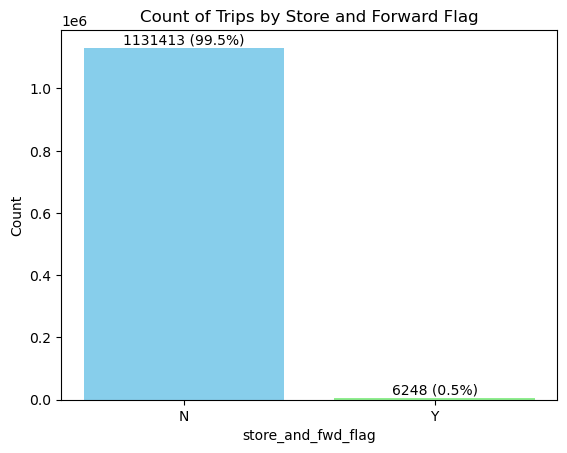

In [39]:
plot_store_and_fwd_trip_counts(df)

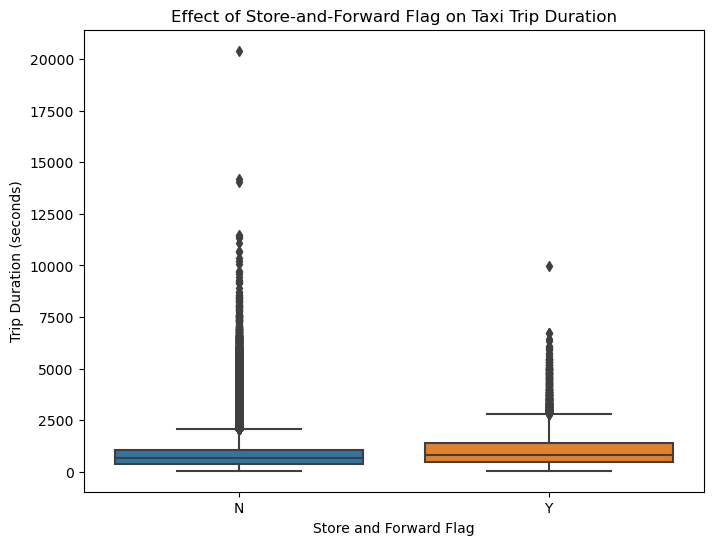

In [40]:
plot_store_and_fwd_trip_duration(df)

**20. Did the ability to send data in real-time depend on how far or close the distance was?**

**Analysis**
- The median trip distance for both 'N' and 'Y' categories is similar, although the 'Y' group has a slightly higher median. This indicates that on average, trips where data is stored and forwarded tend to cover slightly longer distances.
- The IQR (Interquartile Range), which represents the middle 50% of the data, is wider for trips with the 'Y' flag compared to those with 'N'. This suggests more variability in trip distances when the data is stored and forwarded rather than transmitted in real-time.
- Both categories exhibit outliers, with the 'N' group having a significant number of extreme outliers, indicating some very long-distance trips. The 'Y' group also has outliers, but fewer compared to the 'N' group.
- The maximum trip distance for both categories appears to be comparable. However, the presence of more extreme outliers in the 'N' group may suggest that some trips are recorded as longer in real-time transmission.
- While the store-and-forward mechanism ('Y') may be associated with slightly longer trips, the real-time transmission ('N') group exhibits more variability in trip distance. This could imply that the ability to transmit data in real-time is either used for a broader variety of trips or more likely to capture longer, abnormal trips.

**Recommendation**
- Real-time data transmission ('N') appears to capture a wider range of trip distances, including many outliers. This may be an opportunity to enhance monitoring of long trips in real-time, providing better insights into trip patterns and potentially identifying anomalies such as inefficient routes or fraudulent activity.
- The presence of significant outliers in both groups, especially the 'N' group, indicates the need for an outlier detection system. Identifying trips with unusually long distances can help in operational cost-saving, route optimization, and detection of abnormal behaviors (e.g., driver detours or technical data issues).

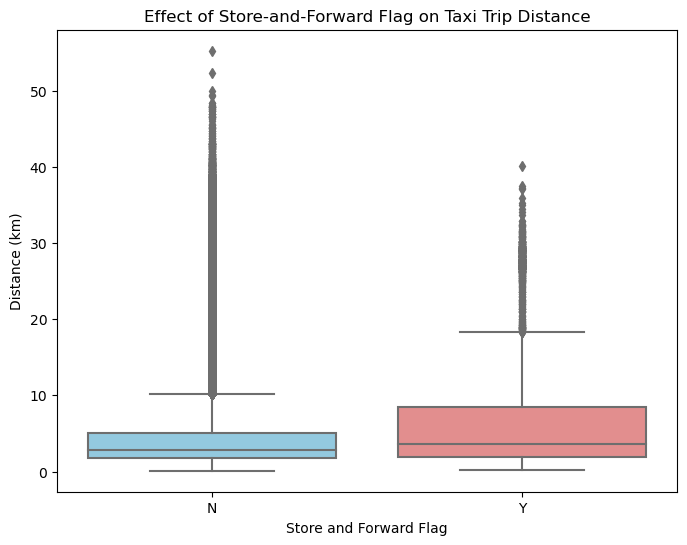

In [41]:
plot_store_and_fwd_trip_distance(df)

---

In [42]:
df.to_csv('train_temp3.csv', index=False) # index=False to avoid saving the index as a column

In [43]:
stop_here = True

if stop_here:
    raise RuntimeError("Execution stopped manually.")

RuntimeError: Execution stopped manually.

In [2]:
dtype_columns = {
    'vendor_id': 'object',
    'pickup_datetime_month': 'object',
    'pickup_datetime_hour': 'object',
    'dropoff_datetime_month': 'object',
    'dropoff_datetime_hour': 'object'
}

In [3]:
df = pd.read_csv('train_temp3.csv', dtype=dtype_columns)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137661 entries, 0 to 1137660
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   id                        1137661 non-null  object 
 1   vendor_id                 1137661 non-null  object 
 2   passenger_count           1137661 non-null  int64  
 3   pickup_longitude          1137661 non-null  float64
 4   pickup_latitude           1137661 non-null  float64
 5   dropoff_longitude         1137661 non-null  float64
 6   dropoff_latitude          1137661 non-null  float64
 7   store_and_fwd_flag        1137661 non-null  object 
 8   distance_osrm             1137661 non-null  float64
 9   speed_osrm                1137661 non-null  float64
 10  pickup_datetime_month     1137661 non-null  object 
 11  pickup_datetime_hour      1137661 non-null  object 
 12  pickup_datetime_weekday   1137661 non-null  object 
 13  pickup_datetime_period    1

<div id="unncols">
    <div style="font-size:20pt;font-weight:700;padding:20px 0;line-height:1.2">3.2 Drop Unnecessary Columns</div>
</div>

**Features to Drop:**
- `id`: This is just an identifier and doesn't provide any predictive value.
- `dropoff_datetime_month`, `dropoff_datetime_weekday`, `dropoff_datetime_hour`, `dropoff_datetime_period`: These are derived from the drop-off time, which we generally do not know in advance when making predictions. They should be dropped to avoid data leakage.

In [5]:
columns_to_drop = ['id', 'dropoff_datetime_month', 'dropoff_datetime_weekday', 
                   'dropoff_datetime_hour', 'dropoff_datetime_period']

In [6]:
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137661 entries, 0 to 1137660
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   vendor_id                1137661 non-null  object 
 1   passenger_count          1137661 non-null  int64  
 2   pickup_longitude         1137661 non-null  float64
 3   pickup_latitude          1137661 non-null  float64
 4   dropoff_longitude        1137661 non-null  float64
 5   dropoff_latitude         1137661 non-null  float64
 6   store_and_fwd_flag       1137661 non-null  object 
 7   distance_osrm            1137661 non-null  float64
 8   speed_osrm               1137661 non-null  float64
 9   pickup_datetime_month    1137661 non-null  object 
 10  pickup_datetime_hour     1137661 non-null  object 
 11  pickup_datetime_weekday  1137661 non-null  object 
 12  pickup_datetime_period   1137661 non-null  object 
 13  trip_duration            1137661 non-null 

<div id="kmeansclus">
    <div style="font-size:20pt;font-weight:700;padding:20px 0;line-height:1.2">3.3 K-means Clustering</div>
</div>

I will transform the features `pickup_longitude`, `pickup_latitude`, `dropoff_longitude`, and `dropoff_latitude` into `pickup_cluster` and `dropoff_cluster` using the K-means clustering method. This transformation is necessary to reduce the complexity of the spatial data by grouping nearby locations into distinct clusters, which simplifies the relationship between location and trip duration. 

Clustering helps the model capture regional patterns and spatial dependencies in a more generalized way, reducing the noise from small variations in exact coordinates. Additionally, using clusters can improve the model’s ability to predict trip durations more accurately by focusing on larger geographic areas rather than individual points, ultimately enhancing computational efficiency and performance.

In [8]:
pickup_coords = df[['pickup_longitude', 'pickup_latitude']]
dropoff_coords = df[['dropoff_longitude', 'dropoff_latitude']]

The optimal number of clusters (k) is determined by identifying the point where the inertia (sum of squared distances) begins to decrease at a slower rate, forming an "elbow" in the plot. In this analysis, the elbow is evident at k = 4 for the pickup cluster and k = 3 for the drop-off cluster, indicating where the reduction in inertia starts to level off. By selecting these values for k, I aim to achieve a balanced model that captures sufficient complexity while avoiding overfitting, resulting in a more stable clustering solution.

In progress... k = 1
In progress... k = 2
In progress... k = 3
In progress... k = 4
In progress... k = 5
In progress... k = 6
In progress... k = 7
In progress... k = 8
In progress... k = 9
In progress... k = 10


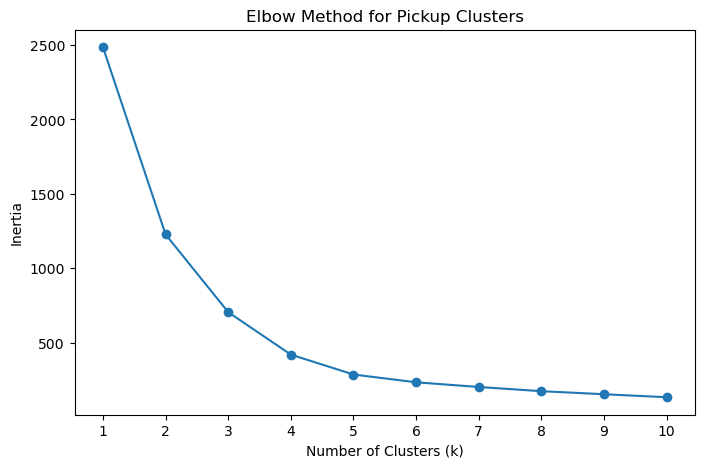

In [9]:
elbow_method(pickup_coords, title='Elbow Method for Pickup Clusters')

In progress... k = 1
In progress... k = 2
In progress... k = 3
In progress... k = 4
In progress... k = 5
In progress... k = 6
In progress... k = 7
In progress... k = 8
In progress... k = 9
In progress... k = 10


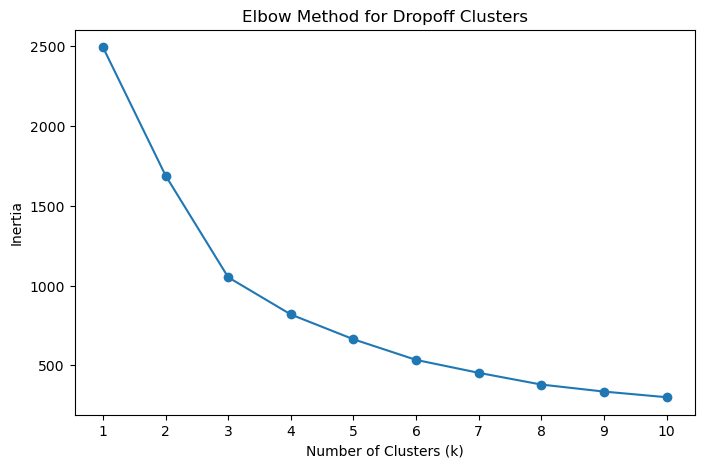

In [10]:
elbow_method(dropoff_coords, title='Elbow Method for Dropoff Clusters')

In [11]:
optimal_k_pickup = 4
optimal_k_dropoff = 3

In [12]:
kmeans_pickup = KMeans(n_clusters=optimal_k_pickup, random_state=rst, n_init=10)
df['pickup_cluster'] = kmeans_pickup.fit_predict(pickup_coords)

In [13]:
kmeans_dropoff = KMeans(n_clusters=optimal_k_dropoff, random_state=rst, n_init=10)
df['dropoff_cluster'] = kmeans_dropoff.fit_predict(dropoff_coords)

In [14]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance_osrm,speed_osrm,pickup_datetime_month,pickup_datetime_hour,pickup_datetime_weekday,pickup_datetime_period,trip_duration,pickup_cluster,dropoff_cluster
0,2,1,-73.862762,40.768822,-73.891701,40.746689,N,5.6729,18.025102,6,18,Wednesday,Evening,1133,3,2
1,2,1,-73.958038,40.783237,-73.975510,40.760853,N,2.9567,12.000135,4,13,Monday,Afternoon,887,2,0
2,2,1,-73.969460,40.785519,-73.989243,40.771748,N,2.8334,14.869155,5,12,Saturday,Afternoon,686,2,0
3,1,1,-73.981743,40.736549,-73.998352,40.726440,N,2.3150,10.188264,5,18,Saturday,Evening,818,0,1
4,2,1,-73.977913,40.752609,-73.975647,40.733139,N,2.9457,11.150915,4,22,Sunday,Night,951,2,1


In [15]:
df.shape

(1137661, 16)

In [16]:
# # Pick n random samples
# sampled_df_pickup = sample_clusters(df, 'pickup_cluster', n=10000)
# sampled_df_dropoff = sample_clusters(df, 'dropoff_cluster', n=10000)

In [17]:
# sampled_df_pickup.shape, sampled_df_dropoff.shape

In [18]:
# %%time
# # running time = 1-2 min
# plot_cluster_map(sampled_df_pickup, cluster_type='pickup', output_file='pickup_clusters_map.html')

In [19]:
# %%time
# # running time = 1-2 min
# plot_cluster_map(sampled_df_dropoff, cluster_type='dropoff', output_file='dropoff_clusters_map.html')

In [20]:
# %%time
# # running time = 2-3 min
# plot_cluster(df, 'pickup')

In [21]:
# %%time
# # running time = 2-3 min
# plot_cluster(df, 'dropoff')

By analyzing these clusters, we will identify which cluster has the most significant features influencing taxi trip duration using feature selection techniques and machine learning models.

**New York City Map**

![NYC Map](img/nyc_map_small.png)

**Pickup Cluster (40,000 samples)**

![pickup cluster](img/pickup_cluster.png)

**Pickup Cluster (all data)**

![pickup plot](img/pickup_plot.png)

**Dropoff Cluster (30,000 samples)**

![dropoff cluster](img/dropoff_cluster.png)

**Dropoff Cluster (all data)**

![dropoff plot](img/dropoff_plot.png)

---

Now that we've created `pickup_cluster` and `dropoff_cluster` features using K-means, we can safely drop the original geographic coordinates (`pickup_longitude`, `pickup_latitude`, `dropoff_longitude`, `dropoff_latitude`). The clusters capture the key spatial patterns by grouping similar locations into regions, making the precise coordinates unnecessary.

By dropping the original features, we reduce dimensionality, improve model efficiency, and prevent overfitting to specific locations. The clusters provide a higher-level, more interpretable representation of location data that is sufficient for machine learning models.

This simplifies the dataset without losing important geographic information.

In [22]:
cols_to_drop = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

In [23]:
df.drop(columns=cols_to_drop, axis=1, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137661 entries, 0 to 1137660
Data columns (total 12 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   vendor_id                1137661 non-null  object 
 1   passenger_count          1137661 non-null  int64  
 2   store_and_fwd_flag       1137661 non-null  object 
 3   distance_osrm            1137661 non-null  float64
 4   speed_osrm               1137661 non-null  float64
 5   pickup_datetime_month    1137661 non-null  object 
 6   pickup_datetime_hour     1137661 non-null  object 
 7   pickup_datetime_weekday  1137661 non-null  object 
 8   pickup_datetime_period   1137661 non-null  object 
 9   trip_duration            1137661 non-null  int64  
 10  pickup_cluster           1137661 non-null  int32  
 11  dropoff_cluster          1137661 non-null  int32  
dtypes: float64(2), int32(2), int64(2), object(6)
memory usage: 95.5+ MB


---

In [25]:
df.to_csv('train_temp4.csv', index=False) # index=False to avoid saving the index as a column

In [26]:
stop_here = True

if stop_here:
    raise RuntimeError("Execution stopped manually.")

RuntimeError: Execution stopped manually.

In [2]:
dtype_columns = {
    'vendor_id': 'object',
    'pickup_datetime_month': 'object',
    'pickup_datetime_hour': 'object',
    'pickup_cluster': 'object',
    'dropoff_cluster': 'object'
}

In [3]:
df = pd.read_csv('train_temp4.csv', dtype=dtype_columns)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137661 entries, 0 to 1137660
Data columns (total 12 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   vendor_id                1137661 non-null  object 
 1   passenger_count          1137661 non-null  int64  
 2   store_and_fwd_flag       1137661 non-null  object 
 3   distance_osrm            1137661 non-null  float64
 4   speed_osrm               1137661 non-null  float64
 5   pickup_datetime_month    1137661 non-null  object 
 6   pickup_datetime_hour     1137661 non-null  object 
 7   pickup_datetime_weekday  1137661 non-null  object 
 8   pickup_datetime_period   1137661 non-null  object 
 9   trip_duration            1137661 non-null  int64  
 10  pickup_cluster           1137661 non-null  object 
 11  dropoff_cluster          1137661 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 104.2+ MB


<div id="feslecenginering">
    <div style="font-size:25pt;font-weight:700;padding:20px 0;line-height:1.2">4. Feature Selection and Engineering</div>
</div>

<div id="corrmatrix">
    <div style="font-size:20pt;font-weight:700;padding:20px 0;line-height:1.2">4.1 Correlation Matrix</div>
</div>

**Analysis**

1. Strong Correlation:
    - **Trip Duration and Distance**: The correlation coefficient of 0.78 indicates a strong positive relationship. This suggests that as the distance of the trip increases, the trip duration tends to increase as well. This is expected, as longer trips generally take more time.
2. Moderate Correlation:
    - **Speed and Distance**: The correlation coefficient of 0.59 indicates a moderate positive relationship. This suggests that faster speeds tend to correlate with longer distances, which is consistent with the idea that faster trips will cover more distance in the same time frame.
3. Weak Correlation:
    - **Other variables**, such as trip duration with speed (correlation of 0.09) and trip duration with passenger count (correlation of 0.01), show weak relationships. The weak correlation implies that changes in these variables do not strongly affect each other.

**VIF Thresholds**
- A VIF value of 1 indicates no correlation between the variable and other variables.
- A VIF between 1 and 5 suggests moderate correlation, which is generally acceptable.
- A VIF above 5 indicates high multicollinearity, which can be problematic.
- A VIF above 10 is typically considered very high, suggesting significant multicollinearity issues.

**Addressing Multicollinearity**
- `speed_osrm`: VIF of 3.76. While the VIF indicates moderate multicollinearity, it is below the critical threshold of 5. Thus, it may not be necessary to remove it from the model unless it becomes a significant concern during further analysis or if it complicates interpretation. It could be worth exploring its interaction with other variables instead of outright removal.
- `distance_osrm`: VIF of 2.64. Similar to speed, this variable has a moderate VIF and can be retained in the model. It plays a crucial role in predicting trip duration, given its strong correlation with the dependent variable.
- `passenger_count`: VIF of 1.96. This variable shows low VIF and can be included without concerns about multicollinearity.

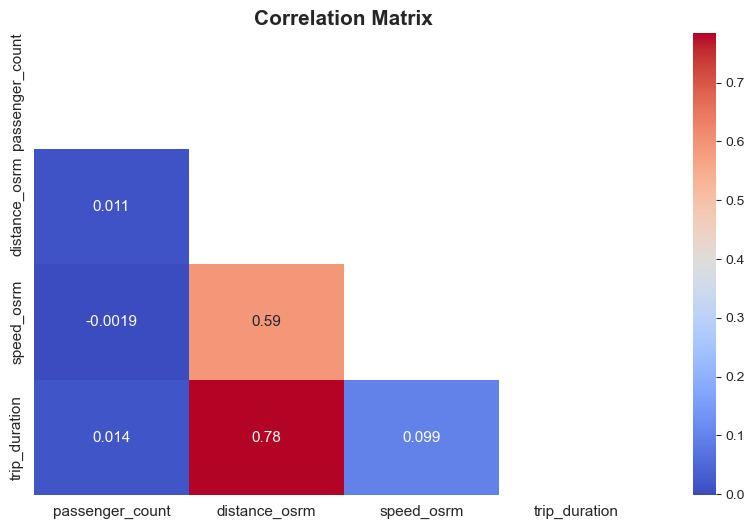

In [5]:
num_corr(df)

In [6]:
get_ranked_correlations(df)

,Variable 1,Variable 2,Correlation,Rank,Strength
7,trip_duration,distance_osrm,0.784362,1.0,Strong
6,speed_osrm,distance_osrm,0.591117,2.0,Moderate
11,trip_duration,speed_osrm,0.099257,3.0,Weak
3,trip_duration,passenger_count,0.013764,4.0,Weak
1,distance_osrm,passenger_count,0.011388,5.0,Weak
2,speed_osrm,passenger_count,-0.001883,6.0,Weak


In [7]:
calc_vif(df, 'trip_duration')

,Features,VIF
0,speed_osrm,3.756763
1,distance_osrm,2.645414
2,passenger_count,1.956254


---

In [8]:
df.to_csv('train_temp5.csv', index=False) # index=False to avoid saving the index as a column

In [9]:
stop_here = True

if stop_here:
    raise RuntimeError("Execution stopped manually.")

RuntimeError: Execution stopped manually.

<div id="modselbuild">
    <div style="font-size:25pt;font-weight:700;padding:20px 0;line-height:1.2">5. Model Selection and Building</div>
</div>

<div id="mcagstegs">
    <div style="font-size:20pt;font-weight:700;padding:20px 0;line-height:1.2">5.1 Model Comparison Across Stages</div>
</div>

**Baseline Model**

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [4]:
df.duplicated().sum().sum()

0

In [5]:
df = datetime_transform(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype   
---  ------                    --------------    -----   
 0   id                        1458644 non-null  object  
 1   vendor_id                 1458644 non-null  int64   
 2   passenger_count           1458644 non-null  int64   
 3   pickup_longitude          1458644 non-null  float64 
 4   pickup_latitude           1458644 non-null  float64 
 5   dropoff_longitude         1458644 non-null  float64 
 6   dropoff_latitude          1458644 non-null  float64 
 7   store_and_fwd_flag        1458644 non-null  object  
 8   trip_duration             1458644 non-null  int64   
 9   pickup_datetime_year      1458644 non-null  int64   
 10  pickup_datetime_month     1458644 non-null  int64   
 11  pickup_datetime_hour      1458644 non-null  int64   
 12  pickup_datetime_weekday   1458644 non-null  object  
 13  pickup_datet

In [7]:
X = df.drop(columns="trip_duration", axis=1)
y = df["trip_duration"]

In [8]:
# train = 80%, test = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = rst)

In [9]:
print(f"training shapes: {X_train.shape}, {y_train.shape}")
print(f"testing shapes: {X_test.shape}, {y_test.shape}")

training shapes: (1166915, 18), (1166915,)
testing shapes: (291729, 18), (291729,)


In [10]:
df = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [11]:
print(f"train shape: {df.shape}")
print(f"test shape: {test.shape}")

train shape: (1166915, 19)
test shape: (291729, 19)


In [12]:
df.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [13]:
columns_to_drop = ['id', 'pickup_datetime_year', 'dropoff_datetime_year',
                   'dropoff_datetime_month', 'dropoff_datetime_weekday', 
                   'dropoff_datetime_hour', 'dropoff_datetime_period']

In [14]:
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1166915 entries, 1053743 to 121958
Data columns (total 12 columns):
 #   Column                   Non-Null Count    Dtype   
---  ------                   --------------    -----   
 0   vendor_id                1166915 non-null  int64   
 1   passenger_count          1166915 non-null  int64   
 2   pickup_longitude         1166915 non-null  float64 
 3   pickup_latitude          1166915 non-null  float64 
 4   dropoff_longitude        1166915 non-null  float64 
 5   dropoff_latitude         1166915 non-null  float64 
 6   store_and_fwd_flag       1166915 non-null  object  
 7   pickup_datetime_month    1166915 non-null  int64   
 8   pickup_datetime_hour     1166915 non-null  int64   
 9   pickup_datetime_weekday  1166915 non-null  object  
 10  pickup_datetime_period   1166915 non-null  category
 11  trip_duration            1166915 non-null  int64   
dtypes: category(1), float64(4), int64(5), object(2)
memory usage: 107.9+ MB


**Label Encoding**

In [16]:
df["pickup_datetime_weekday"] = df["pickup_datetime_weekday"].map({"Monday":1,"Tuesday":2,"Wednesday":3, 
                                                                   "Thursday":4, "Friday":5, "Saturday":6, 
                                                                   "Sunday":7}).astype("int")

**Dummy Encoding**

In [17]:
columns = ["vendor_id","store_and_fwd_flag", "pickup_datetime_period"]

In [18]:
df = pd.get_dummies(df, columns=columns, dtype=int, drop_first=True)

**Cyclical Encoding**

The pickup_datetime_period feature is created using bins that categorize distinct parts of the day (Early Morning, Morning, Afternoon, Evening, Night). Each of these categories is qualitative and represents a segment of time rather than a continuous cycle. For example, Early Morning does not directly transition into Night, nor does it imply a cyclical relationship.

The binning method I used creates distinct categories that do not wrap around. The periods are inherently separate. Therefore, applying cyclical encoding could mislead the model into interpreting a non-existent continuity among these categories.

In [19]:
df['hour_sin'] = np.sin(2 * np.pi * df['pickup_datetime_hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['pickup_datetime_hour'] / 24)

In [20]:
df['weekday_sin'] = np.sin(2 * np.pi * df['pickup_datetime_weekday'] / 7)
df['weekday_cos'] = np.cos(2 * np.pi * df['pickup_datetime_weekday'] / 7)

In [21]:
df['month_sin'] = np.sin(2 * np.pi * df['pickup_datetime_month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['pickup_datetime_month'] / 12)

In [22]:
df.drop(columns=['pickup_datetime_hour', 'pickup_datetime_weekday', 'pickup_datetime_month'], axis=1, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1166915 entries, 1053743 to 121958
Data columns (total 18 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   passenger_count                   1166915 non-null  int64  
 1   pickup_longitude                  1166915 non-null  float64
 2   pickup_latitude                   1166915 non-null  float64
 3   dropoff_longitude                 1166915 non-null  float64
 4   dropoff_latitude                  1166915 non-null  float64
 5   trip_duration                     1166915 non-null  int64  
 6   vendor_id_2                       1166915 non-null  int32  
 7   store_and_fwd_flag_Y              1166915 non-null  int32  
 8   pickup_datetime_period_Morning    1166915 non-null  int32  
 9   pickup_datetime_period_Afternoon  1166915 non-null  int32  
 10  pickup_datetime_period_Evening    1166915 non-null  int32  
 11  pickup_datetime_period_Night    

In [24]:
test = transform_set(test)

In [25]:
X_train = df.drop(columns="trip_duration", axis=1)
y_train = df["trip_duration"]

In [26]:
X_test = test.drop(columns="trip_duration", axis=1)
y_test = test["trip_duration"]

In [27]:
print(f"training shapes: {X_train.shape}, {y_train.shape}")
print(f"testing shapes: {X_test.shape}, {y_test.shape}")

training shapes: (1166915, 17), (1166915,)
testing shapes: (291729, 17), (291729,)


**Learning Curve the Baseline Model**

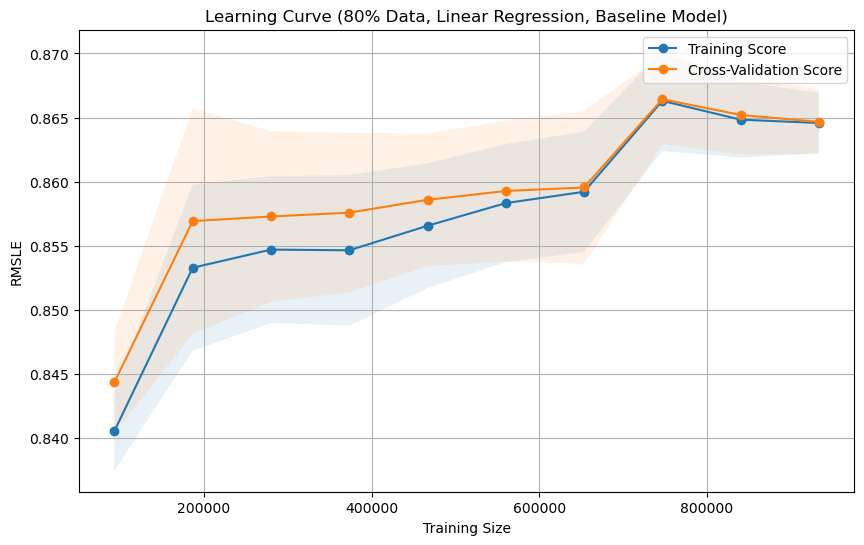

In [28]:
plot_learning_curve(LinearRegression(), X_train, y_train, 
                    title='Learning Curve (80% Data, Linear Regression, Baseline Model)')

**Graph Analysis**
- Initial Behavior (Left Side of the Graph, Small Training Sizes)
    - At the start (low training size), the cross-validation error is high but drops significantly as the training size increases. This indicates that the model initially struggles to generalize due to the small training data.
    - The training error is also relatively high and decreases sharply with more data, showing that the model initially underfits (it doesn’t capture patterns well).
- Mid-range Behavior (Middle of the Graph)
    - As the training size increases, the cross-validation and training errors converge more closely. This is a sign that the model is improving its generalization and benefiting from additional data.
    - Both the training and cross-validation errors stabilize around a similar value, suggesting a good balance between bias and variance.
- Final Behavior (Right Side of the Graph, Large Training Sizes)
    - At larger training sizes, the cross-validation error plateaus and even slightly increases, while the training error remains relatively stable.
    - The gap between the training and cross-validation scores is small, indicating that the model is not overfitting but rather reaching its capacity for improvement with the given data and linear regression approach.
    - The slight increase in cross-validation error at the end suggests that adding more data alone might not significantly improve performance and that the model's complexity may need to be increased to capture more patterns.

**Options for Improvement**
- Feature Engineering
    - Adding more relevant features or transforming existing features could help reduce the RMSLE and improve the model's performance.
- Try More Complex Models
    - Linear regression is a simple baseline. Trying models like decision trees or gradient boosting (e.g., XGBoost, LightGBM) might reduce the RMSLE further.
- Hyperparameter Tuning
    - Even for linear regression, tuning regularization parameters (like Ridge or Lasso) might help improve the fit.

**Train and Test the Baseline Model**

In [29]:
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = baseline_model.predict(X_test)

In [31]:
y_pred[y_pred < 0]

array([-1.07209271e+03, -5.91798448e+01, -6.60656795e+02, -3.93198048e+02,
       -3.95485452e+02, -1.37820400e+02, -1.89729839e+01, -6.60675129e+02,
       -3.52546860e+02, -7.06549446e+00, -2.67370345e+02, -5.50998945e+02,
       -2.42358523e+02, -4.14664940e+03, -1.74986705e+03, -9.88716950e+01,
       -6.83854556e+03, -5.27570288e+02, -8.41430268e+02, -1.24560187e+02,
       -1.23943723e+00, -9.51945502e+01, -1.31310329e+03, -7.38450308e+02])

In [32]:
# Clip negative predictions to zero since duration cannot be negative
y_pred = np.clip(y_pred, 0, None)

In [33]:
rmsle_baseline = rmsle(y_test, y_pred)
print(f'Baseline Linear Regression RMSLE: {rmsle_baseline:.4f}')

Baseline Linear Regression RMSLE: 0.8646


**Stage 1: Adding distance_osrm Feature**

In [34]:
df = pd.read_csv("distance_osrm.csv")

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
 11  distance_osrm       1458627 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 133.5+ MB


In [36]:
df.duplicated().sum().sum()

0

In [37]:
df = datetime_transform(df)

In [38]:
X = df.drop(columns="trip_duration", axis=1)
y = df["trip_duration"]

In [39]:
# train = 80%, test = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = rst)

In [40]:
df = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [41]:
df.isnull().sum().sum(), test.isnull().sum().sum()

(16, 1)

In [42]:
df.dropna(inplace=True)
test.dropna(inplace=True)

In [43]:
df = transform_set(df)
test = transform_set(test)

Baseline Linear Regression RMSLE (100% Data, Stage 1): 0.6556


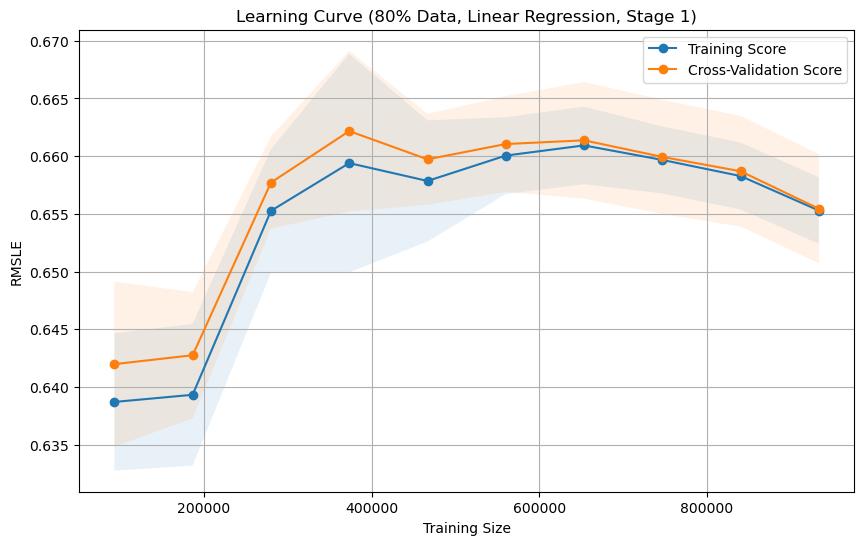

CPU times: total: 4.98 s
Wall time: 33.5 s


In [44]:
%%time
rmsle_baseline_stage1 = model_rmsle(df, test, 'Stage 1', model_type='linear', 
                                    lr_title='Learning Curve (80% Data, Linear Regression, Stage 1)')

**Stage 2: Adding speed_osrm Feature**

In [45]:
df = pd.read_csv("distance_osrm.csv")

In [46]:
df['speed_osrm'] = df.apply(lambda row: calculate_speed(row['trip_duration'], row['distance_osrm']), axis=1)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
 11  distance_osrm       1458627 non-null  float64
 12  speed_osrm          1458627 non-null  float64
dtypes: float64(6), int64(3), object(4)
memory usage: 144.7+ MB


In [48]:
df.duplicated().sum().sum()

0

In [49]:
df = datetime_transform(df)

In [50]:
X = df.drop(columns="trip_duration", axis=1)
y = df["trip_duration"]

In [51]:
# train = 80%, test = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = rst)

In [52]:
df = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [53]:
df.isnull().sum().sum(), test.isnull().sum().sum()

(32, 2)

In [54]:
df.dropna(inplace=True)
test.dropna(inplace=True)

In [55]:
df = transform_set(df)
test = transform_set(test)

Baseline Linear Regression RMSLE (100% Data, Stage 2): 0.6246


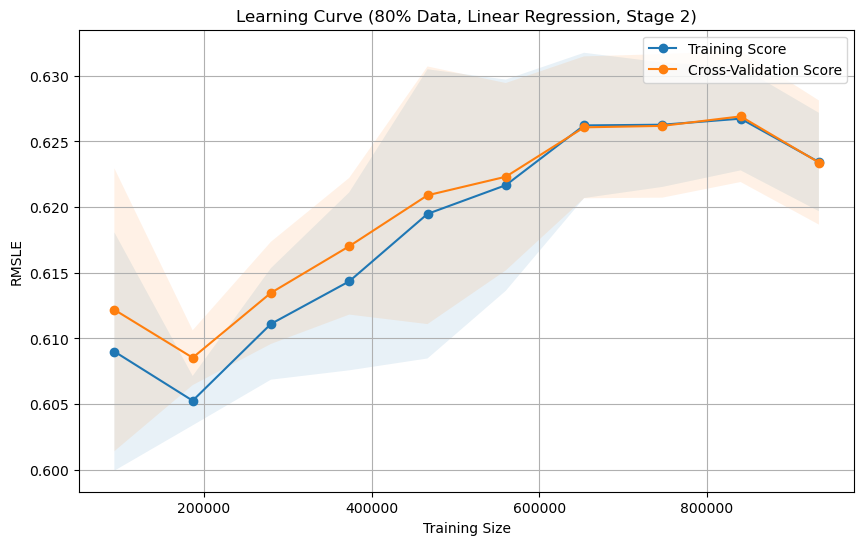

CPU times: total: 5.34 s
Wall time: 34.2 s


In [56]:
%%time
rmsle_baseline_stage2 = model_rmsle(df, test, 'Stage 2', model_type='linear', 
                                   lr_title='Learning Curve (80% Data, Linear Regression, Stage 2)')

**Stage 3: Restricting the boundary to within NYC**

In [57]:
df = pd.read_csv('train_temp.csv')

In [58]:
test = pd.read_csv('test_temp.csv')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166915 entries, 0 to 1166914
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   id                        1166915 non-null  object 
 1   vendor_id                 1166915 non-null  int64  
 2   passenger_count           1166915 non-null  int64  
 3   pickup_longitude          1166915 non-null  float64
 4   pickup_latitude           1166915 non-null  float64
 5   dropoff_longitude         1166915 non-null  float64
 6   dropoff_latitude          1166915 non-null  float64
 7   store_and_fwd_flag        1166915 non-null  object 
 8   distance_osrm             1166899 non-null  float64
 9   speed_osrm                1166899 non-null  float64
 10  pickup_datetime_month     1166915 non-null  int64  
 11  pickup_datetime_hour      1166915 non-null  int64  
 12  pickup_datetime_weekday   1166915 non-null  object 
 13  pickup_datetime_period    1

In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291729 entries, 0 to 291728
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        291729 non-null  object 
 1   vendor_id                 291729 non-null  int64  
 2   passenger_count           291729 non-null  int64  
 3   pickup_longitude          291729 non-null  float64
 4   pickup_latitude           291729 non-null  float64
 5   dropoff_longitude         291729 non-null  float64
 6   dropoff_latitude          291729 non-null  float64
 7   store_and_fwd_flag        291729 non-null  object 
 8   distance_osrm             291728 non-null  float64
 9   speed_osrm                291728 non-null  float64
 10  pickup_datetime_month     291729 non-null  int64  
 11  pickup_datetime_hour      291729 non-null  int64  
 12  pickup_datetime_weekday   291729 non-null  object 
 13  pickup_datetime_period    291729 non-null  o

In [61]:
df_shape_initial = df.shape
test_shape_initial = test.shape

In [62]:
df_shape_initial, test_shape_initial

((1166915, 19), (291729, 19))

In [63]:
%%time
df = within_nyc_boundaries(df)

CPU times: total: 1min 12s
Wall time: 1min 19s


In [64]:
%%time
test = within_nyc_boundaries(test)

CPU times: total: 20 s
Wall time: 21.3 s


In [65]:
df.shape, test.shape

((1164295, 19), (291050, 19))

In [66]:
outside_nyc = (df_shape_initial[0]-df.shape[0]) / df_shape_initial[0] * 100
print(f'I have removed {outside_nyc:.2f}% of the data outside the NYC boundary from the pickup and dropoff points in the train set.')

I have removed 0.22% of the data outside the NYC boundary from the pickup and dropoff points in the train set.


In [67]:
outside_nyc = (test_shape_initial[0]-test.shape[0]) / test_shape_initial[0] * 100
print(f'I have removed {outside_nyc:.2f}% of the data outside the NYC boundary from the pickup and dropoff points in the test set.')

I have removed 0.23% of the data outside the NYC boundary from the pickup and dropoff points in the test set.


In [68]:
df.isnull().sum().sum(), test.isnull().sum().sum()

(8, 0)

In [69]:
df.dropna(inplace=True)
test.dropna(inplace=True)

In [70]:
df = transform_set(df)
test = transform_set(test)

Baseline Linear Regression RMSLE (100% Data, Stage 3): 0.6045


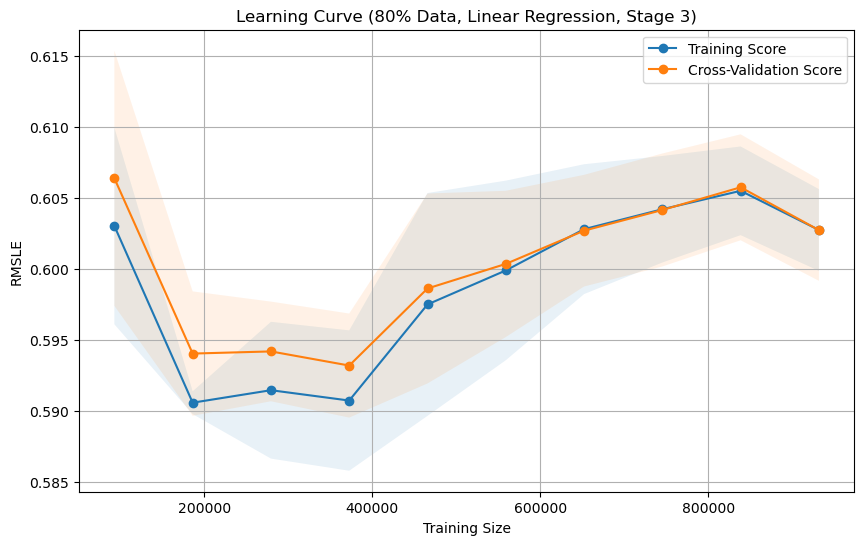

CPU times: total: 5.05 s
Wall time: 36.1 s


In [71]:
%%time
rmsle_baseline_stage3 = model_rmsle(df, test, 'Stage 3', model_type='linear',
                                   lr_title='Learning Curve (80% Data, Linear Regression, Stage 3)')

**Stage 4a: Applying sensible restrictions to trip_duration, speed_osrm, and distance_osrm**

In [72]:
df = pd.read_csv('train_temp.csv')

In [73]:
test = pd.read_csv('test_temp.csv')

In [74]:
df_shape_initial = df.shape
test_shape_initial = test.shape

In [75]:
df_shape_initial, test_shape_initial

((1166915, 19), (291729, 19))

In [76]:
%%time
df = within_nyc_boundaries(df)

CPU times: total: 1min 4s
Wall time: 1min 10s


In [77]:
%%time
test = within_nyc_boundaries(test)

CPU times: total: 20.4 s
Wall time: 22.6 s


In [78]:
# minimum trip duration = 60 seconds
df = df[df["trip_duration"] >= 60]
test = test[test["trip_duration"] >= 60]

In [79]:
df.shape, test.shape

((1157760, 19), (289413, 19))

In [80]:
outliers = (df_shape_initial[0]-df.shape[0]) / df_shape_initial[0] * 100
print(f'I have removed {outliers:.2f}% of the data in the train set.')

I have removed 0.78% of the data in the train set.


In [81]:
outliers = (test_shape_initial[0]-test.shape[0]) / test_shape_initial[0] * 100
print(f'I have removed {outliers:.2f}% of the data in the test set.')

I have removed 0.79% of the data in the test set.


In [82]:
df.isnull().sum().sum(), test.isnull().sum().sum()

(2, 0)

In [83]:
df.dropna(inplace=True)
test.dropna(inplace=True)

In [84]:
df = transform_set(df)
test = transform_set(test)

Baseline Linear Regression RMSLE (100% Data, Stage 4a): 1.5655


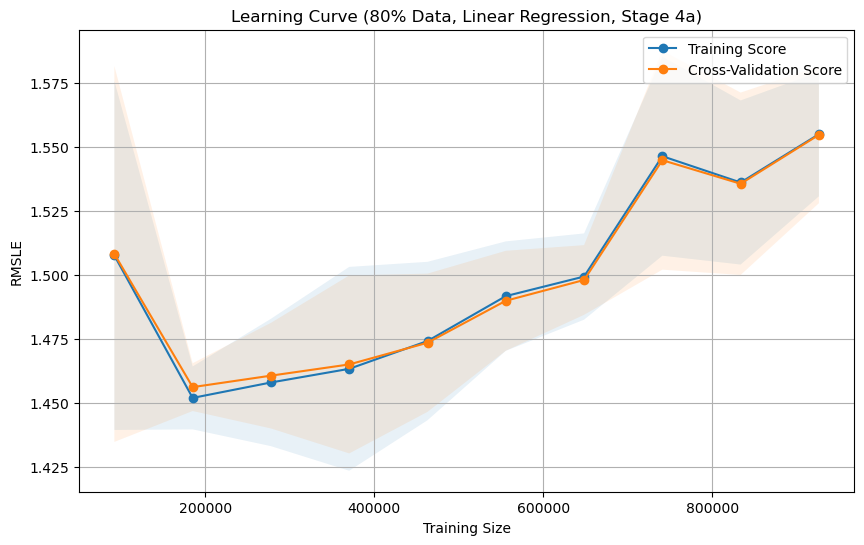

CPU times: total: 4.88 s
Wall time: 30.8 s


In [85]:
%%time
rmsle_baseline_stage4a = model_rmsle(df, test, 'Stage 4a', model_type='linear',
                                    lr_title='Learning Curve (80% Data, Linear Regression, Stage 4a)')

I observed a sharp increase in the RMSLE (Root Mean Squared Logarithmic Error) when I applied a restriction on the minimum trip duration. This increase is largely due to how RMSLE behaves when dealing with small values.

In [86]:
print(f'Baseline Linear Regression RMSLE (100% Data, Stage 3): {rmsle_baseline_stage3:.4f}')
print(f'Baseline Linear Regression RMSLE (100% Data, Stage 4a): {rmsle_baseline_stage4a:.4f}')

Baseline Linear Regression RMSLE (100% Data, Stage 3): 0.6045
Baseline Linear Regression RMSLE (100% Data, Stage 4a): 1.5655


**Why RMSLE Increases with Minimum Trip Duration Restriction?**

* Effect of Small Values on RMSLE:
    - RMSLE penalizes under-predictions for smaller values more severely than for larger ones. This happens because the logarithmic transformation, which RMSLE uses, compresses the range for larger values but keeps smaller values more sensitive. When I removed trips with short durations (such as those less than 60 seconds), I likely eliminated a substantial portion of the trips with lower durations. These short trips could have been predicted more accurately by the model, which would have contributed to lowering the RMSLE score. By removing them, I essentially removed data points that could have helped the model perform better on small values.
* Imbalance in Data:
    - By filtering out these shorter trips, I also changed the distribution of the target variable, `trip_duration`. Trips shorter than 60 seconds might represent a significant part of the dataset. When I removed them, the model became biased toward longer trips, which caused it to perform worse overall because the model was trained on one distribution and then evaluated on a different one. This shift impacts the model's ability to generalize well across the data.
* Logarithmic Transformation Impact:
    - Because RMSLE compares the logarithm of actual values and predicted values, removing small trip durations compresses the range of values toward larger ones. As a result, the model’s errors on longer trips become relatively larger when measured on this compressed logarithmic scale. This further increases the RMSLE score after the filtering.

**Stage 4b: Stage 3 with Log Transformation**

In [87]:
df = pd.read_csv('train_temp.csv')

In [88]:
test = pd.read_csv('test_temp.csv')

In [89]:
df_shape_initial = df.shape
test_shape_initial = test.shape

In [90]:
df_shape_initial, test_shape_initial

((1166915, 19), (291729, 19))

In [91]:
%%time
df = within_nyc_boundaries(df)

CPU times: total: 1min 2s
Wall time: 1min 3s


In [92]:
%%time
test = within_nyc_boundaries(test)

CPU times: total: 18.6 s
Wall time: 18.6 s


In [93]:
df.shape, test.shape

((1164295, 19), (291050, 19))

In [94]:
outliers = (df_shape_initial[0]-df.shape[0]) / df_shape_initial[0] * 100
print(f'I have removed {outliers:.2f}% of the data in the train set.')

I have removed 0.22% of the data in the train set.


In [95]:
outliers = (test_shape_initial[0]-test.shape[0]) / test_shape_initial[0] * 100
print(f'I have removed {outliers:.2f}% of the data in the test set.')

I have removed 0.23% of the data in the test set.


In [96]:
df.isnull().sum().sum(), test.isnull().sum().sum()

(8, 0)

In [97]:
df.dropna(inplace=True)
test.dropna(inplace=True)

In [98]:
# log(1 + trip_duration) to handle zero values
df['log_trip_duration'] = np.log1p(df['trip_duration'])
test['log_trip_duration'] = np.log1p(test['trip_duration'])

In [99]:
df.drop("trip_duration", axis=1, inplace=True)
test.drop("trip_duration", axis=1, inplace=True)

In [100]:
df.rename(columns={'log_trip_duration': 'trip_duration'}, inplace=True)
test.rename(columns={'log_trip_duration': 'trip_duration'}, inplace=True)

In [101]:
df = transform_set(df)
test = transform_set(test)

Baseline Linear Regression RMSLE (100% Data, Stage 4b): 0.5739


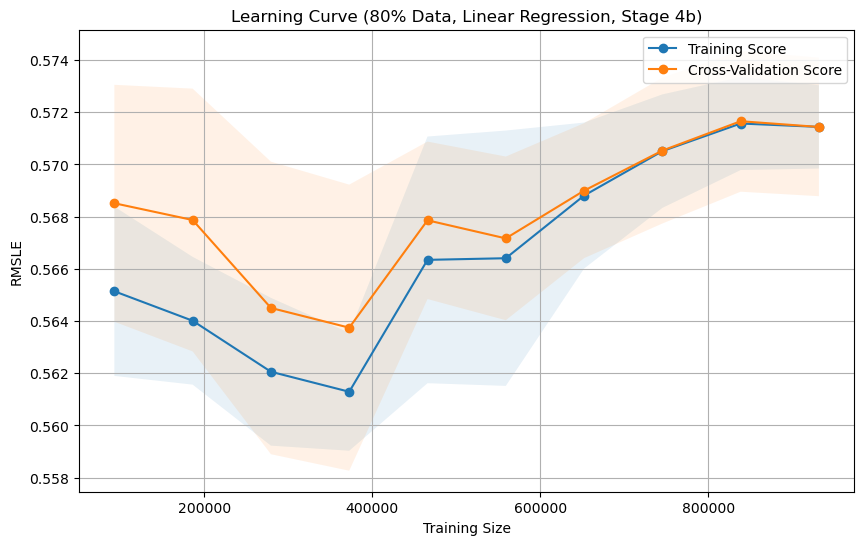

CPU times: total: 4.95 s
Wall time: 29.9 s


In [102]:
%%time
rmsle_baseline_stage4b = model_rmsle(df, test, 'Stage 4b', model_type='linear', transform = 'log_transform',
                                     lr_title='Learning Curve (80% Data, Linear Regression, Stage 4b)')

**Stage 4c: Applying sensible restrictions to trip_duration, speed_osrm, and distance_osrm with Log Transformation**

In [103]:
df = pd.read_csv('train_temp.csv')

In [104]:
test = pd.read_csv('test_temp.csv')

In [105]:
df_shape_initial = df.shape
test_shape_initial = test.shape

In [106]:
df_shape_initial, test_shape_initial

((1166915, 19), (291729, 19))

In [107]:
%%time
df = within_nyc_boundaries(df)

CPU times: total: 1min
Wall time: 1min


In [108]:
%%time
test = within_nyc_boundaries(test)

CPU times: total: 18.1 s
Wall time: 18.2 s


In [109]:
# minimum trip duration = 60 seconds
df = df[df["trip_duration"] >= 60]
test = test[test["trip_duration"] >= 60]

In [110]:
df.shape, test.shape

((1157760, 19), (289413, 19))

In [111]:
outliers = (df_shape_initial[0]-df.shape[0]) / df_shape_initial[0] * 100
print(f'I have removed {outliers:.2f}% of the data in the train set.')

I have removed 0.78% of the data in the train set.


In [112]:
outliers = (test_shape_initial[0]-test.shape[0]) / test_shape_initial[0] * 100
print(f'I have removed {outliers:.2f}% of the data in the test set.')

I have removed 0.79% of the data in the test set.


In [113]:
df.isnull().sum().sum(), test.isnull().sum().sum()

(2, 0)

In [114]:
df.dropna(inplace=True)
test.dropna(inplace=True)

In [115]:
# log(1 + trip_duration) to handle zero values
df['log_trip_duration'] = np.log1p(df['trip_duration'])
test['log_trip_duration'] = np.log1p(test['trip_duration'])

In [116]:
df.drop("trip_duration", axis=1, inplace=True)
test.drop("trip_duration", axis=1, inplace=True)

In [117]:
df.rename(columns={'log_trip_duration': 'trip_duration'}, inplace=True)
test.rename(columns={'log_trip_duration': 'trip_duration'}, inplace=True)

In [118]:
df = transform_set(df)
test = transform_set(test)

Baseline Linear Regression RMSLE (100% Data, Stage 4c): 0.4424


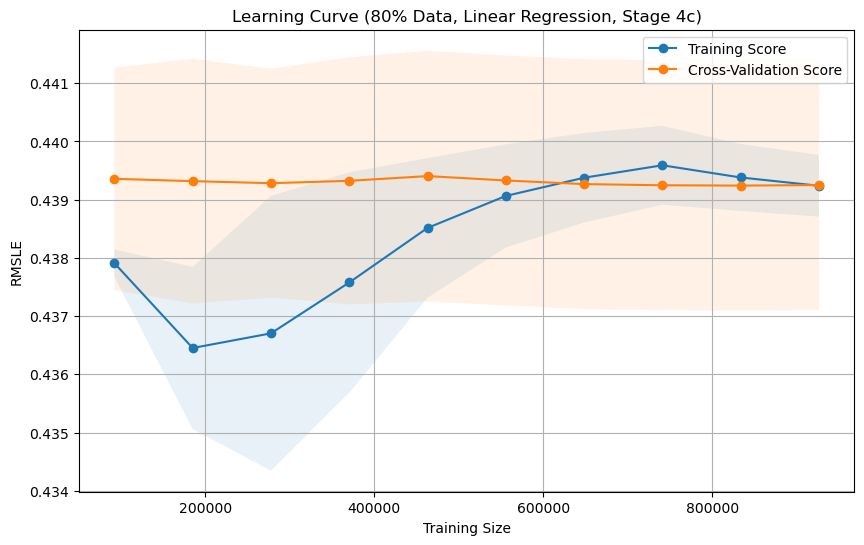

CPU times: total: 4.94 s
Wall time: 29.7 s


In [119]:
%%time
rmsle_baseline_stage4c = model_rmsle(df, test, 'Stage 4c', model_type='linear', transform = 'log_transform',
                                    lr_title='Learning Curve (80% Data, Linear Regression, Stage 4c)')

**Stage 4d: Final Result - Applying sensible restrictions to trip_duration, speed_osrm, and distance_osrm with Log Transformation**

In [120]:
df = pd.read_csv('train_temp.csv')

In [121]:
test = pd.read_csv('test_temp.csv')

In [122]:
df_shape_initial = df.shape
test_shape_initial = test.shape

In [123]:
df_shape_initial, test_shape_initial

((1166915, 19), (291729, 19))

In [124]:
%%time
df = within_nyc_boundaries(df)

CPU times: total: 1min
Wall time: 1min


In [125]:
%%time
test = within_nyc_boundaries(test)

CPU times: total: 17.8 s
Wall time: 17.8 s


In [126]:
df = restrict_duration_speed_distance(df)

Max trip_duration = 20400
Min trip_duration = 60
Max distance_osrm = 55.28
Min distance_osrm = 0.10
Max speed_osrm = 149.79
Min speed_osrm = 5.00


In [127]:
test = restrict_duration_speed_distance(test)

Max trip_duration = 13694
Min trip_duration = 60
Max distance_osrm = 49.68
Min distance_osrm = 0.10
Max speed_osrm = 149.21
Min speed_osrm = 5.00


In [128]:
df.shape, test.shape

((1137661, 19), (284237, 19))

In [129]:
outliers = (df_shape_initial[0]-df.shape[0]) / df_shape_initial[0] * 100
print(f'I have removed {outliers:.2f}% of the data in the train set.')

I have removed 2.51% of the data in the train set.


In [130]:
outliers = (test_shape_initial[0]-test.shape[0]) / test_shape_initial[0] * 100
print(f'I have removed {outliers:.2f}% of the data in the test set.')

I have removed 2.57% of the data in the test set.


In [131]:
df.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [132]:
# log(1 + trip_duration) to handle zero values
df['log_trip_duration'] = np.log1p(df['trip_duration'])
test['log_trip_duration'] = np.log1p(test['trip_duration'])

In [133]:
df.drop("trip_duration", axis=1, inplace=True)
test.drop("trip_duration", axis=1, inplace=True)

In [134]:
df.rename(columns={'log_trip_duration': 'trip_duration'}, inplace=True)
test.rename(columns={'log_trip_duration': 'trip_duration'}, inplace=True)

In [135]:
df = transform_set(df)
test = transform_set(test)

Baseline Linear Regression RMSLE (100% Data, Stage 4d): 0.4026


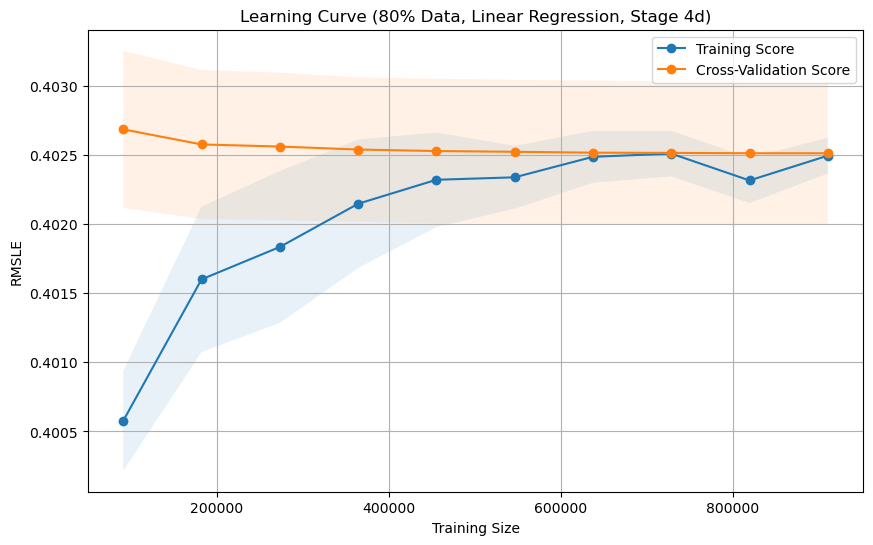

CPU times: total: 4.98 s
Wall time: 28.9 s


In [136]:
%%time
rmsle_baseline_stage4d = model_rmsle(df, test, 'Stage 4d', model_type='linear', transform = 'log_transform',
                                    lr_title='Learning Curve (80% Data, Linear Regression, Stage 4d)')

**Stage 5: Replacing pickup_longitude, pickup_latitude with pickup_cluster and dropoff_longitude, dropoff_latitude with dropoff_cluster**

In [137]:
df = pd.read_csv('train_temp4.csv')

In [138]:
test = pd.read_csv('test_temp.csv')

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137661 entries, 0 to 1137660
Data columns (total 12 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   vendor_id                1137661 non-null  int64  
 1   passenger_count          1137661 non-null  int64  
 2   store_and_fwd_flag       1137661 non-null  object 
 3   distance_osrm            1137661 non-null  float64
 4   speed_osrm               1137661 non-null  float64
 5   pickup_datetime_month    1137661 non-null  int64  
 6   pickup_datetime_hour     1137661 non-null  int64  
 7   pickup_datetime_weekday  1137661 non-null  object 
 8   pickup_datetime_period   1137661 non-null  object 
 9   trip_duration            1137661 non-null  int64  
 10  pickup_cluster           1137661 non-null  int64  
 11  dropoff_cluster          1137661 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 104.2+ MB


In [140]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291729 entries, 0 to 291728
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        291729 non-null  object 
 1   vendor_id                 291729 non-null  int64  
 2   passenger_count           291729 non-null  int64  
 3   pickup_longitude          291729 non-null  float64
 4   pickup_latitude           291729 non-null  float64
 5   dropoff_longitude         291729 non-null  float64
 6   dropoff_latitude          291729 non-null  float64
 7   store_and_fwd_flag        291729 non-null  object 
 8   distance_osrm             291728 non-null  float64
 9   speed_osrm                291728 non-null  float64
 10  pickup_datetime_month     291729 non-null  int64  
 11  pickup_datetime_hour      291729 non-null  int64  
 12  pickup_datetime_weekday   291729 non-null  object 
 13  pickup_datetime_period    291729 non-null  o

In [141]:
test_shape_initial = test.shape

In [142]:
test_shape_initial

(291729, 19)

In [143]:
%%time
test = within_nyc_boundaries(test)

CPU times: total: 18.5 s
Wall time: 18.7 s


In [144]:
test = restrict_duration_speed_distance(test)

Max trip_duration = 13694
Min trip_duration = 60
Max distance_osrm = 49.68
Min distance_osrm = 0.10
Max speed_osrm = 149.21
Min speed_osrm = 5.00


In [145]:
test.shape

(284237, 19)

In [146]:
outliers = (test_shape_initial[0]-test.shape[0]) / test_shape_initial[0] * 100
print(f'I have removed {outliers:.2f}% of the data in the test set.')

I have removed 2.57% of the data in the test set.


In [147]:
df.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [148]:
# log(1 + trip_duration) to handle zero values
df['log_trip_duration'] = np.log1p(df['trip_duration'])
test['log_trip_duration'] = np.log1p(test['trip_duration'])

In [149]:
df.drop("trip_duration", axis=1, inplace=True)
test.drop("trip_duration", axis=1, inplace=True)

In [150]:
df.rename(columns={'log_trip_duration': 'trip_duration'}, inplace=True)
test.rename(columns={'log_trip_duration': 'trip_duration'}, inplace=True)

In [151]:
df = transform_set(df, 2)
test = transform_set(test)

In [152]:
pickup_coords = test[['pickup_longitude', 'pickup_latitude']]
dropoff_coords = test[['dropoff_longitude', 'dropoff_latitude']]

In [153]:
optimal_k_pickup = 4
optimal_k_dropoff = 3

In [154]:
kmeans_pickup = KMeans(n_clusters=optimal_k_pickup, random_state=rst, n_init=10)
test['pickup_cluster'] = kmeans_pickup.fit_predict(pickup_coords)

In [155]:
kmeans_dropoff = KMeans(n_clusters=optimal_k_dropoff, random_state=rst, n_init=10)
test['dropoff_cluster'] = kmeans_dropoff.fit_predict(dropoff_coords)

In [156]:
cols_to_drop = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

In [157]:
test.drop(columns=cols_to_drop, axis=1, inplace=True)

In [158]:
colz = ["pickup_cluster","dropoff_cluster"]
test = pd.get_dummies(test, columns=colz, dtype=int, drop_first=True)

In [159]:
df.columns

Index(['passenger_count', 'distance_osrm', 'speed_osrm', 'trip_duration',
       'pickup_cluster_1', 'pickup_cluster_2', 'pickup_cluster_3',
       'dropoff_cluster_1', 'dropoff_cluster_2', 'vendor_id_2',
       'store_and_fwd_flag_Y', 'pickup_datetime_period_Early Morning',
       'pickup_datetime_period_Evening', 'pickup_datetime_period_Morning',
       'pickup_datetime_period_Night', 'hour_sin', 'hour_cos', 'weekday_sin',
       'weekday_cos', 'month_sin', 'month_cos'],
      dtype='object')

In [160]:
test.columns

Index(['passenger_count', 'distance_osrm', 'speed_osrm', 'trip_duration',
       'vendor_id_2', 'store_and_fwd_flag_Y',
       'pickup_datetime_period_Early Morning',
       'pickup_datetime_period_Evening', 'pickup_datetime_period_Morning',
       'pickup_datetime_period_Night', 'hour_sin', 'hour_cos', 'weekday_sin',
       'weekday_cos', 'month_sin', 'month_cos', 'pickup_cluster_1',
       'pickup_cluster_2', 'pickup_cluster_3', 'dropoff_cluster_1',
       'dropoff_cluster_2'],
      dtype='object')

In [161]:
test = test[df.columns]

In [162]:
test.columns

Index(['passenger_count', 'distance_osrm', 'speed_osrm', 'trip_duration',
       'pickup_cluster_1', 'pickup_cluster_2', 'pickup_cluster_3',
       'dropoff_cluster_1', 'dropoff_cluster_2', 'vendor_id_2',
       'store_and_fwd_flag_Y', 'pickup_datetime_period_Early Morning',
       'pickup_datetime_period_Evening', 'pickup_datetime_period_Morning',
       'pickup_datetime_period_Night', 'hour_sin', 'hour_cos', 'weekday_sin',
       'weekday_cos', 'month_sin', 'month_cos'],
      dtype='object')

Baseline Linear Regression RMSLE (100% Data, Stage 5): 0.3955


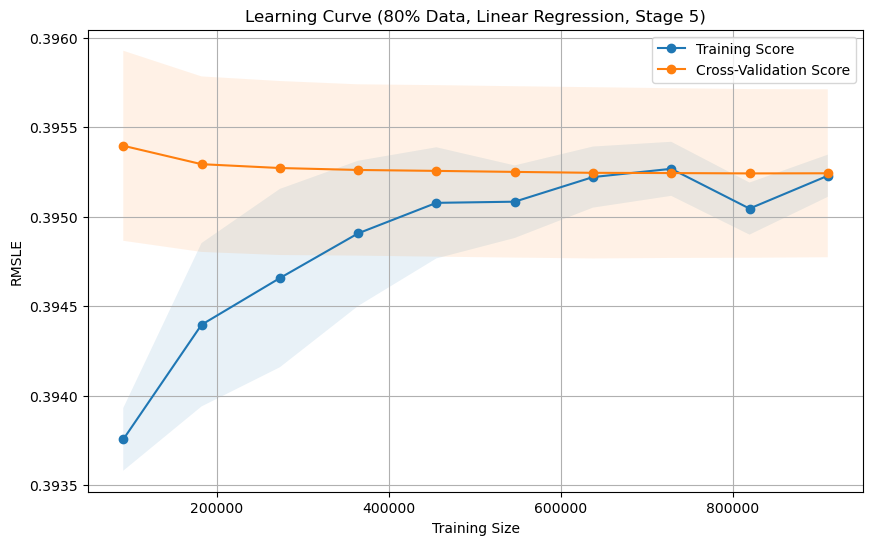

CPU times: total: 3.92 s
Wall time: 28.6 s


In [163]:
%%time
rmsle_baseline_stage5 = model_rmsle(df, test, 'Stage 5', model_type='linear', transform = 'log_transform',
                                    lr_title='Learning Curve (80% Data, Linear Regression, Stage 5)')

In [166]:
print(f'Baseline Linear Regression RMSLE (100% Data): {rmsle_baseline:.4f}')
print(f'Baseline Linear Regression RMSLE (100% Data, Stage 1): {rmsle_baseline_stage1:.4f}')
print(f'Baseline Linear Regression RMSLE (100% Data, Stage 2): {rmsle_baseline_stage2:.4f}')
print(f'Baseline Linear Regression RMSLE (100% Data, Stage 3): {rmsle_baseline_stage3:.4f}')
print(f'Baseline Linear Regression RMSLE (100% Data, Stage 4a): {rmsle_baseline_stage4a:.4f}')
print(f'Baseline Linear Regression RMSLE (100% Data, Stage 4b): {rmsle_baseline_stage4b:.4f}')
print(f'Baseline Linear Regression RMSLE (100% Data, Stage 4c): {rmsle_baseline_stage4c:.4f}')
print(f'Baseline Linear Regression RMSLE (100% Data, Stage 4d): {rmsle_baseline_stage4d:.4f}')
print(f'Baseline Linear Regression RMSLE (100% Data, Stage 5): {rmsle_baseline_stage5:.4f}')

Baseline Linear Regression RMSLE (100% Data): 0.8646
Baseline Linear Regression RMSLE (100% Data, Stage 1): 0.6556
Baseline Linear Regression RMSLE (100% Data, Stage 2): 0.6246
Baseline Linear Regression RMSLE (100% Data, Stage 3): 0.6045
Baseline Linear Regression RMSLE (100% Data, Stage 4a): 1.5655
Baseline Linear Regression RMSLE (100% Data, Stage 4b): 0.5739
Baseline Linear Regression RMSLE (100% Data, Stage 4c): 0.4424
Baseline Linear Regression RMSLE (100% Data, Stage 4d): 0.4026
Baseline Linear Regression RMSLE (100% Data, Stage 5): 0.3955


In [167]:
stop_here = True

if stop_here:
    raise RuntimeError("Execution stopped manually.")

RuntimeError: Execution stopped manually.

<div id="pipline">
    <div style="font-size:20pt;font-weight:700;padding:20px 0;line-height:1.2">5.2 Pipeline</div>
</div>